In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as ma
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 32

In [280]:
markerScale = 30.0

boxFontSize = 28
labelSize = 34

cmInPc = 3.086e18

fmt = '%0.1f'

nullfmt = NullFormatter()

In [281]:
z = 12.00
num = 43
comovbox = 80 # kpc

sbox = comovbox / (1.0 + z) * 0.71 # Create a box that's sbox kpc physical

outfile = "/Users/earnric/Research/RAMSES-Data/27Aug15-3Mpc/output_%05d/info_%05d.txt"%(num,num)
f=open(outfile)
lines=f.readlines()
boxsizecm = float(lines[15].split()[2]) # Get the number at the end of the line... 

grpfile = "hop/grp%05d.pos"%num
locs = np.loadtxt("spLoc_%05.2f.txt"%(z),skiprows=1) # Corrected locations in kpc
mass = np.loadtxt("spMass_%05.2f.txt"%(z),skiprows=1) # Solar masses
ages = np.loadtxt("spBT_%05.2f.txt"%(z),skiprows=1) # Ages are in yr
Z    = np.loadtxt("spZ_%05.2f.txt"%(z),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZ_%05.2f.txt"%(z),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPF_%05.2f.txt"%(z),skiprows=1) # SOLAR units in the file... 

In [282]:
print("boxsize at z=%.2f is %.2f kpc"%(z,boxsizecm/cmInPc/1000.0))
print("sbox for plotting %.2lf"%sbox)

boxsize at z=12.00 is 324.40 kpc
sbox for plotting 4.37


In [289]:
halosRawPos = np.loadtxt(grpfile, skiprows=1)
halosRawPos -= 0.5
halosRawPos = halosRawPos[:,4:7][0:150]
tbox = boxsizecm/cmInPc/1000.0
halosPos = halosRawPos * tbox

In [284]:
ma.log10(len(Zfixed)),len(Zfixed)

(4.703910129266088, 50572)

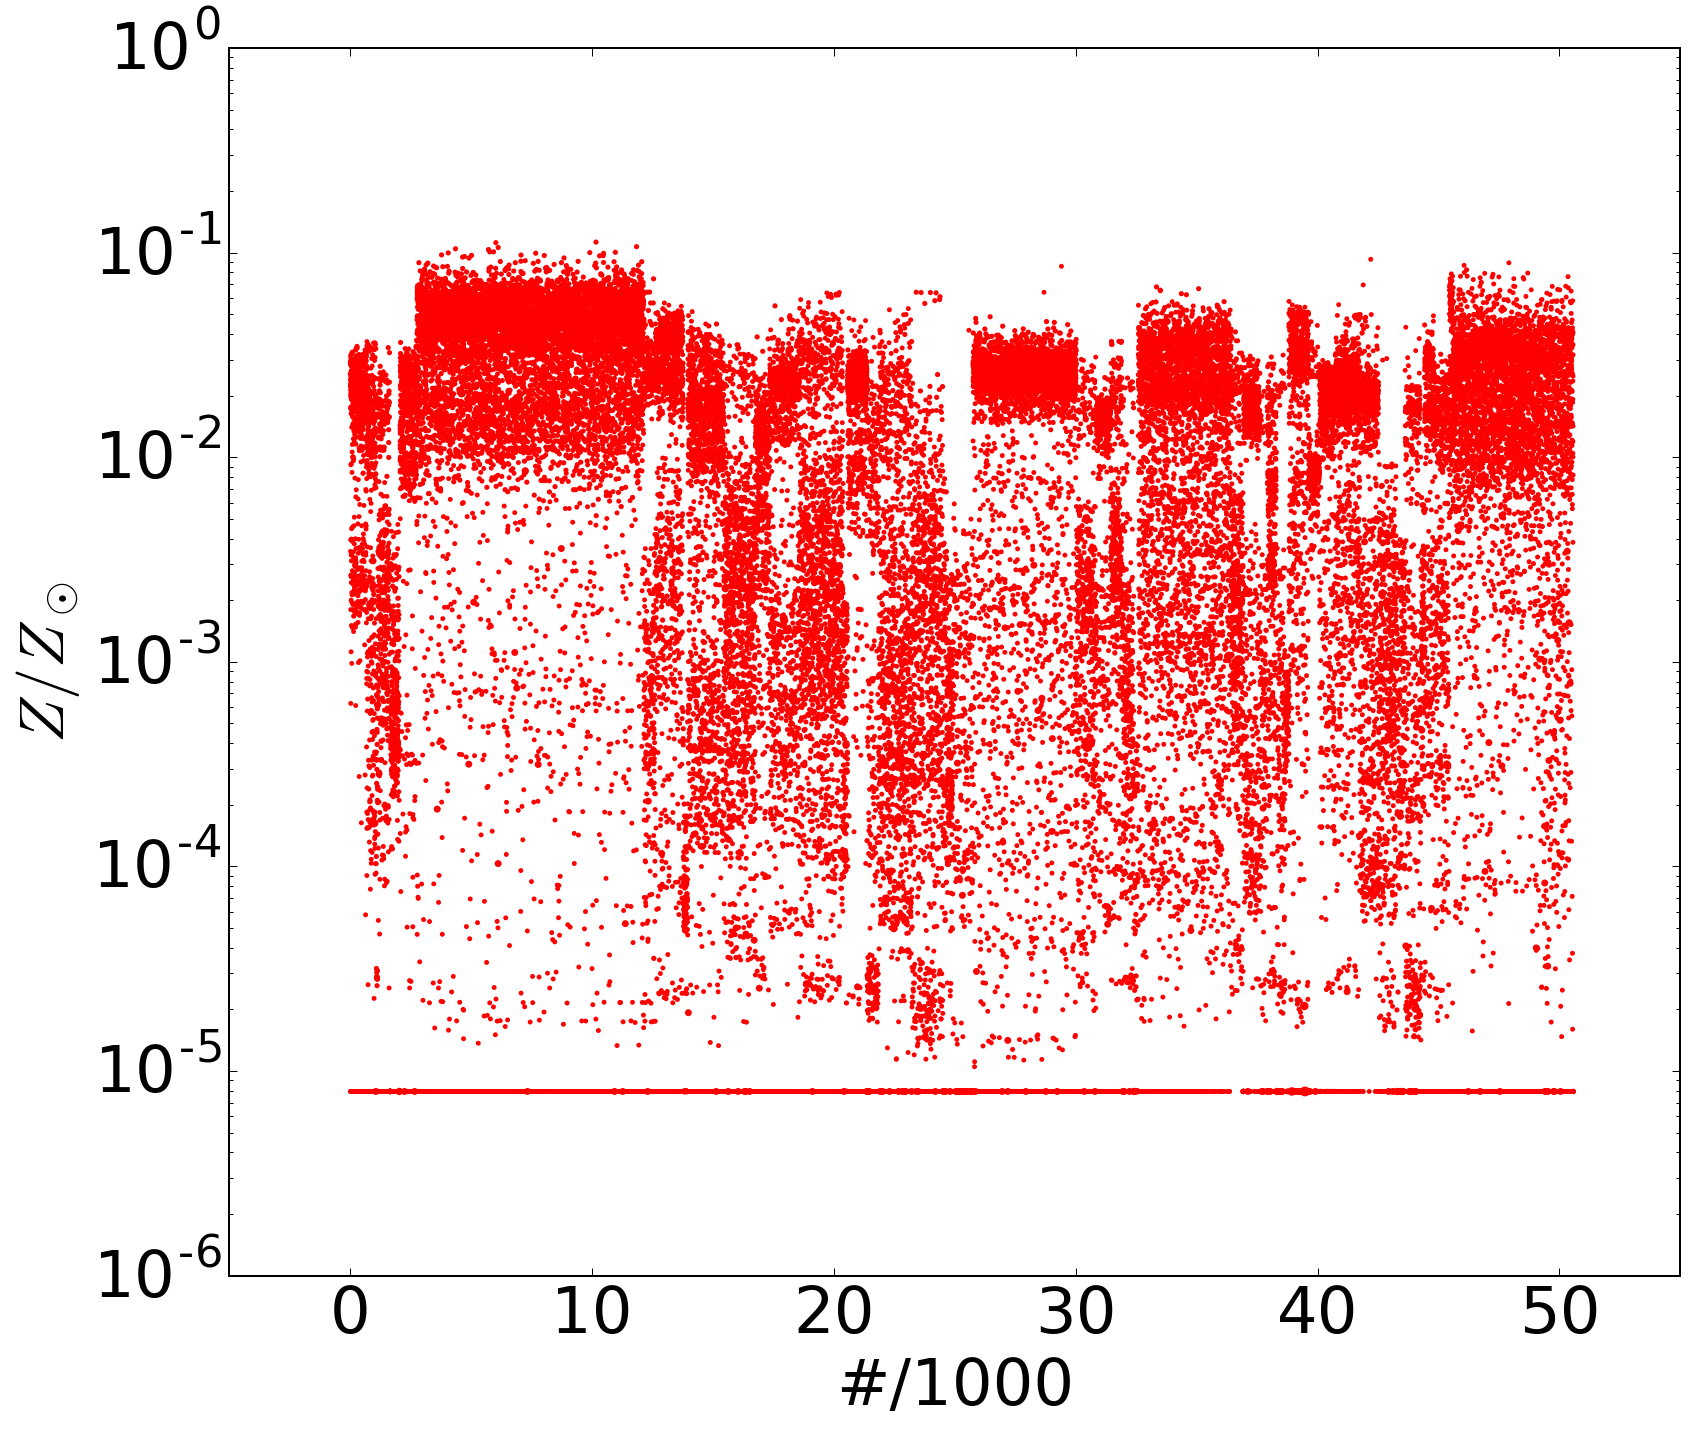

In [216]:
Zfixed = Z
Zfixed[Zfixed < 1e-5] = 10**-5.1
fig = plt.figure()
ax = plt.gca()
ax.scatter(np.arange(0,len(Zfixed)),Zfixed,s=mass/markerScale, marker='.',c='r', edgecolors='')
ax.set_yscale('log')
ax.set_ylim([1e-6,1])

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1000))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_xlim([-5000,55000])

ax.set_xlabel('#/1000')
ax.set_ylabel(r'$Z/Z_\odot$')

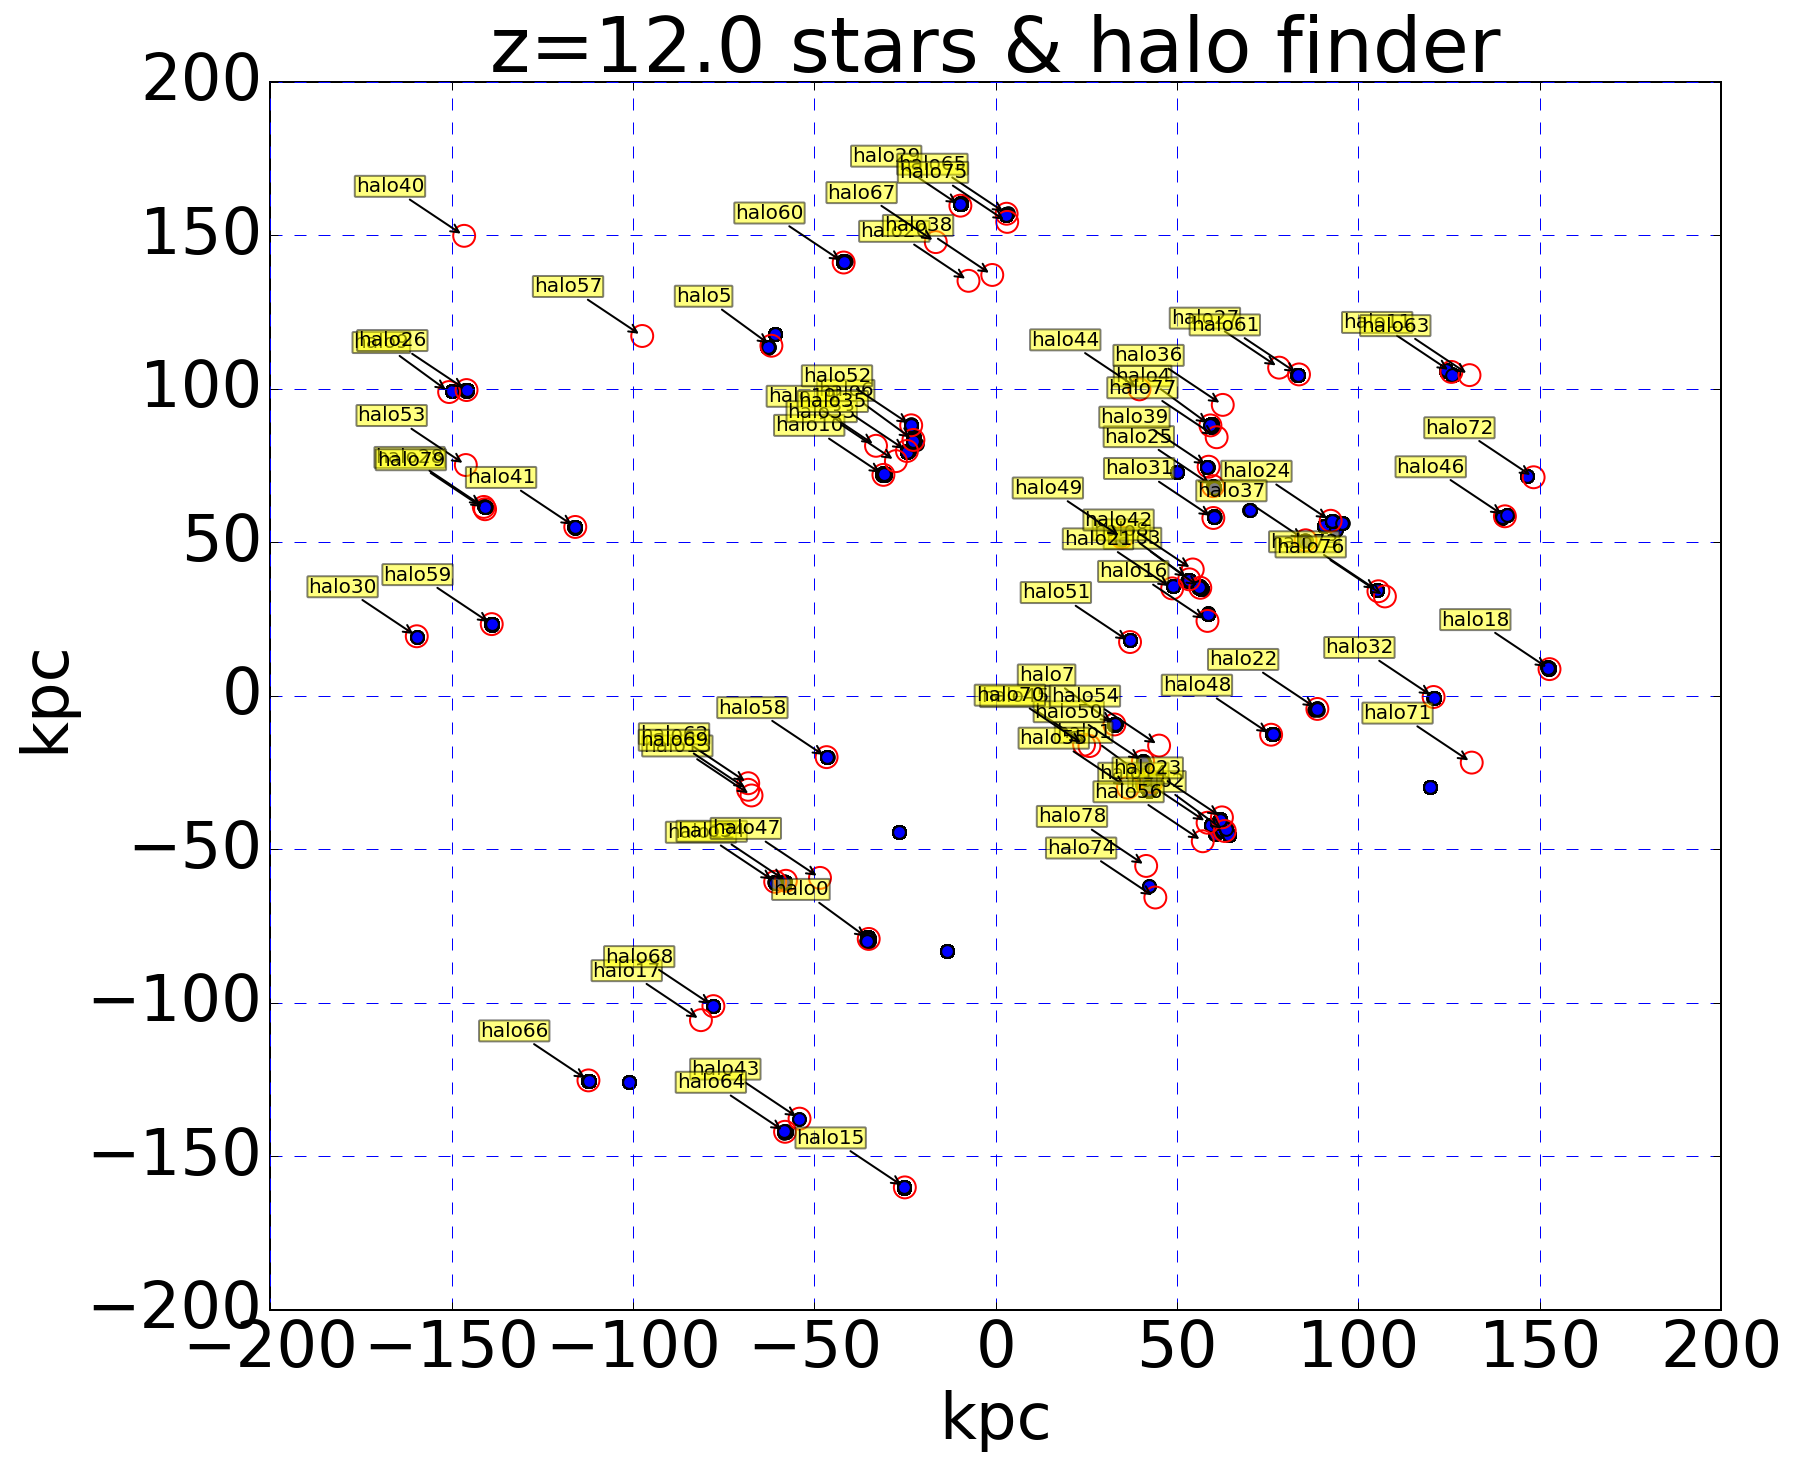

In [290]:
htp = 80
labels = ['halo{0}'.format(i) for i in range(len(halosPos))]
plt.scatter(locs[:,0],locs[:,1],s=40,c='b') # Plot star particles
plt.scatter(halosPos[:htp,0],halosPos[:htp,1],s=120,facecolors='none', edgecolors='r') # Plot halo locs
plt.grid(b=True, which='major', color='b', linestyle='--')
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.title('z=%.1lf stars & halo finder'%z)
for label, x, y in zip(labels, halosPos[:htp,0],halosPos[:htp,1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

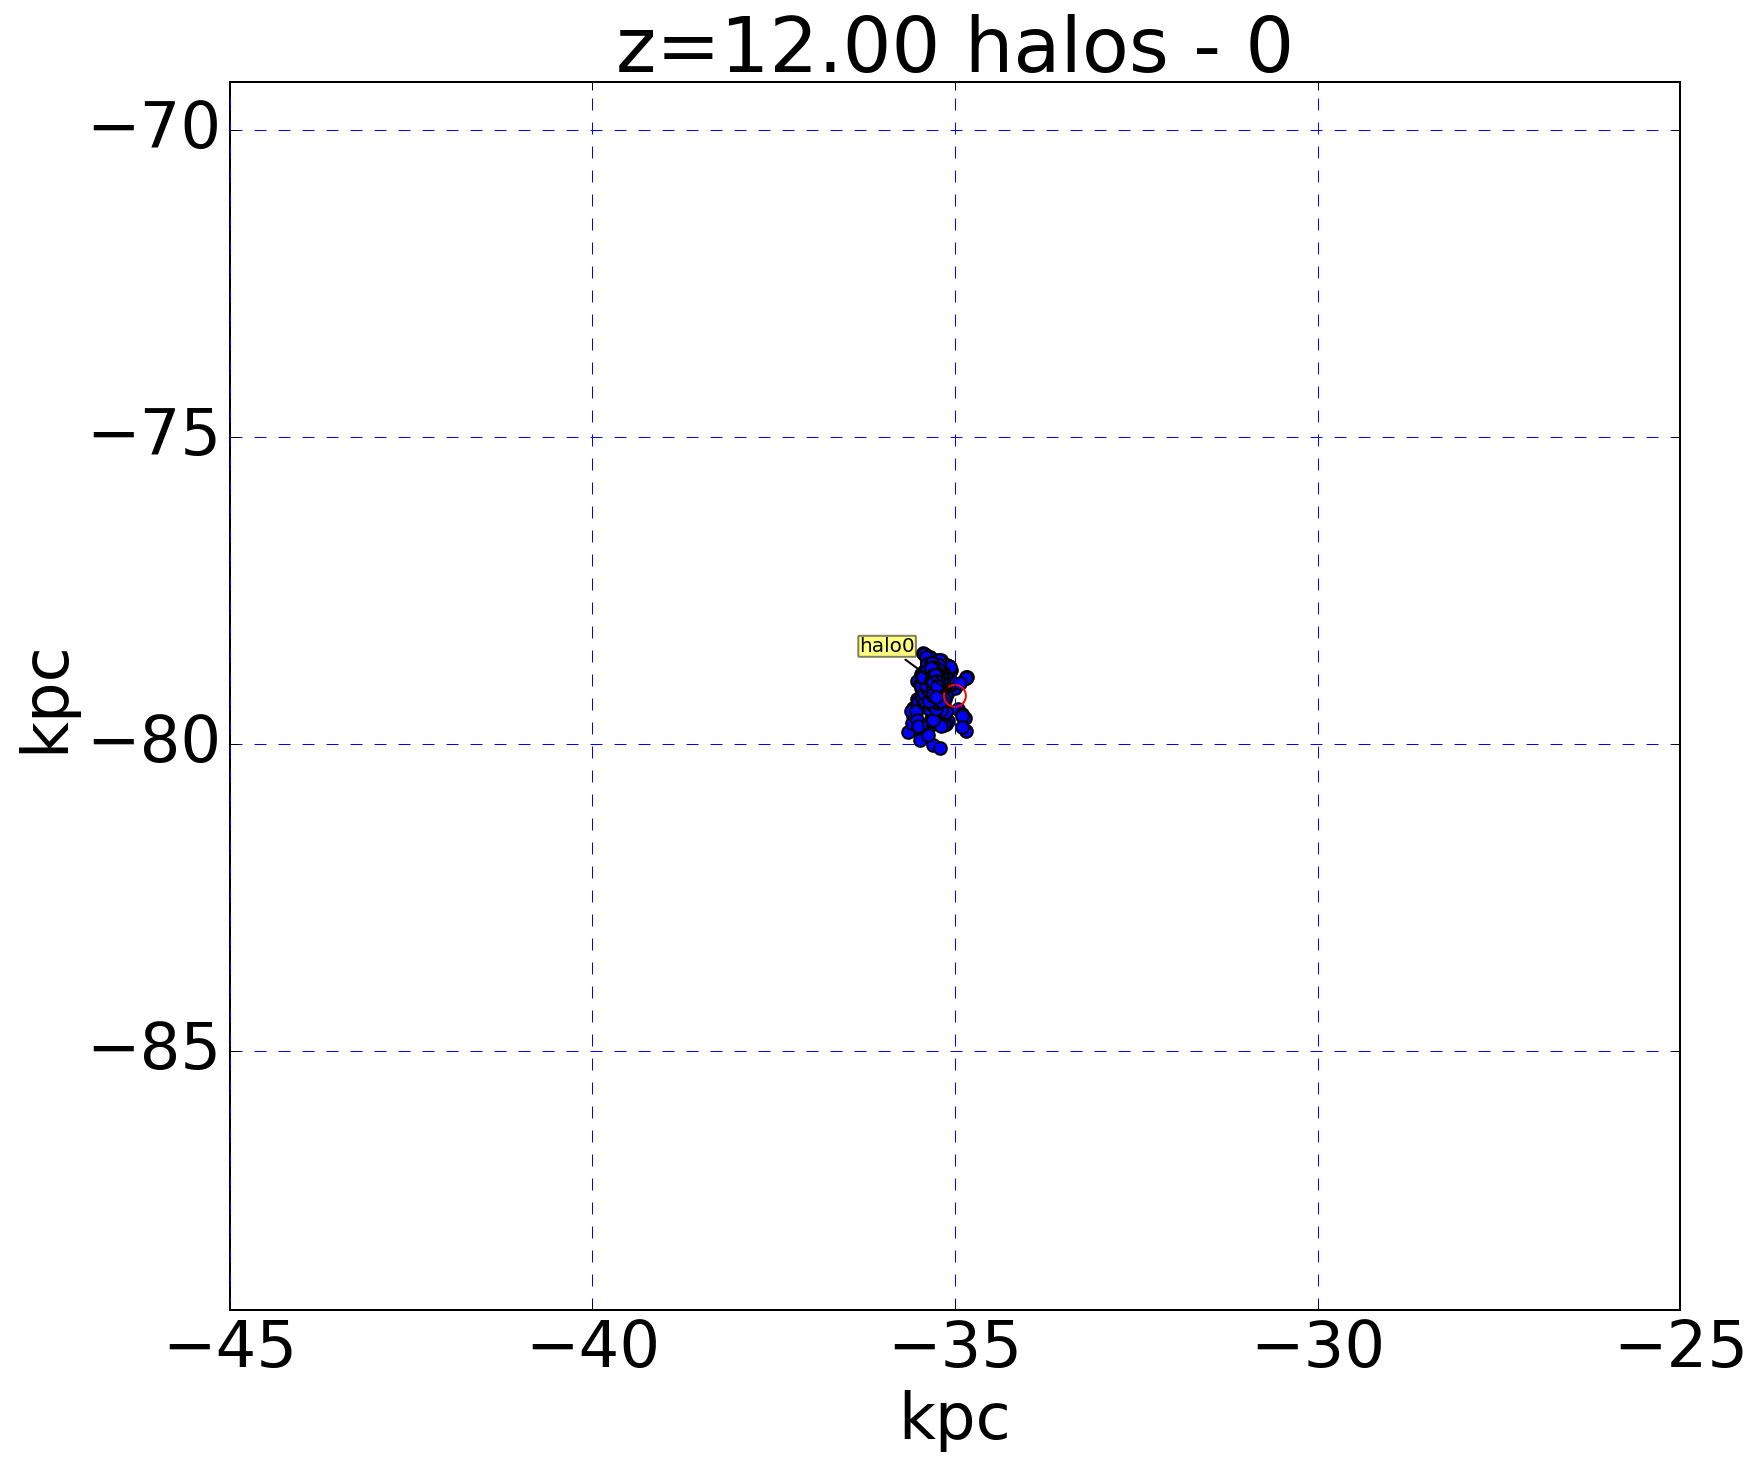

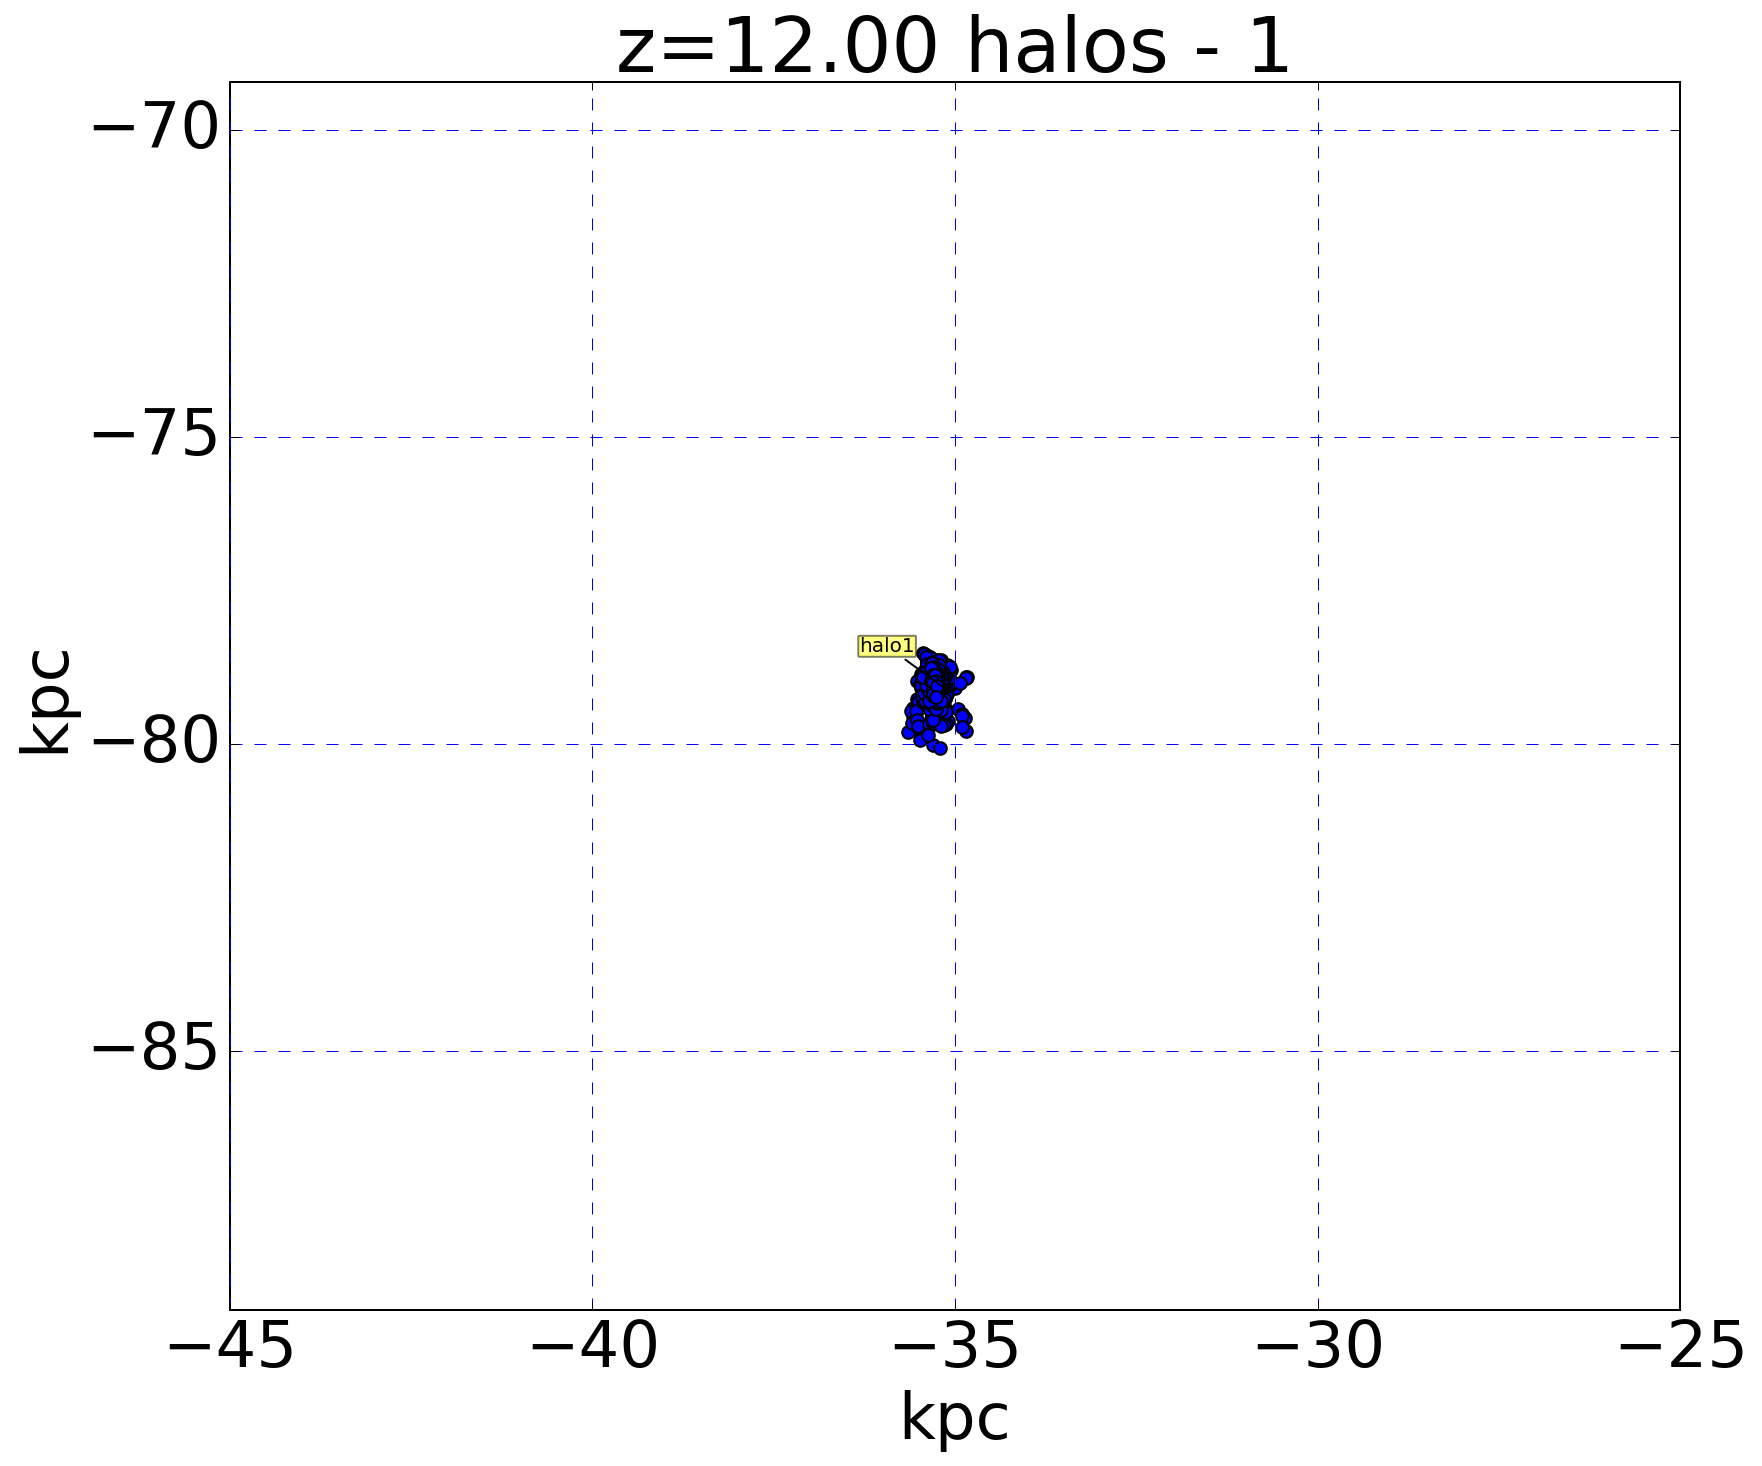

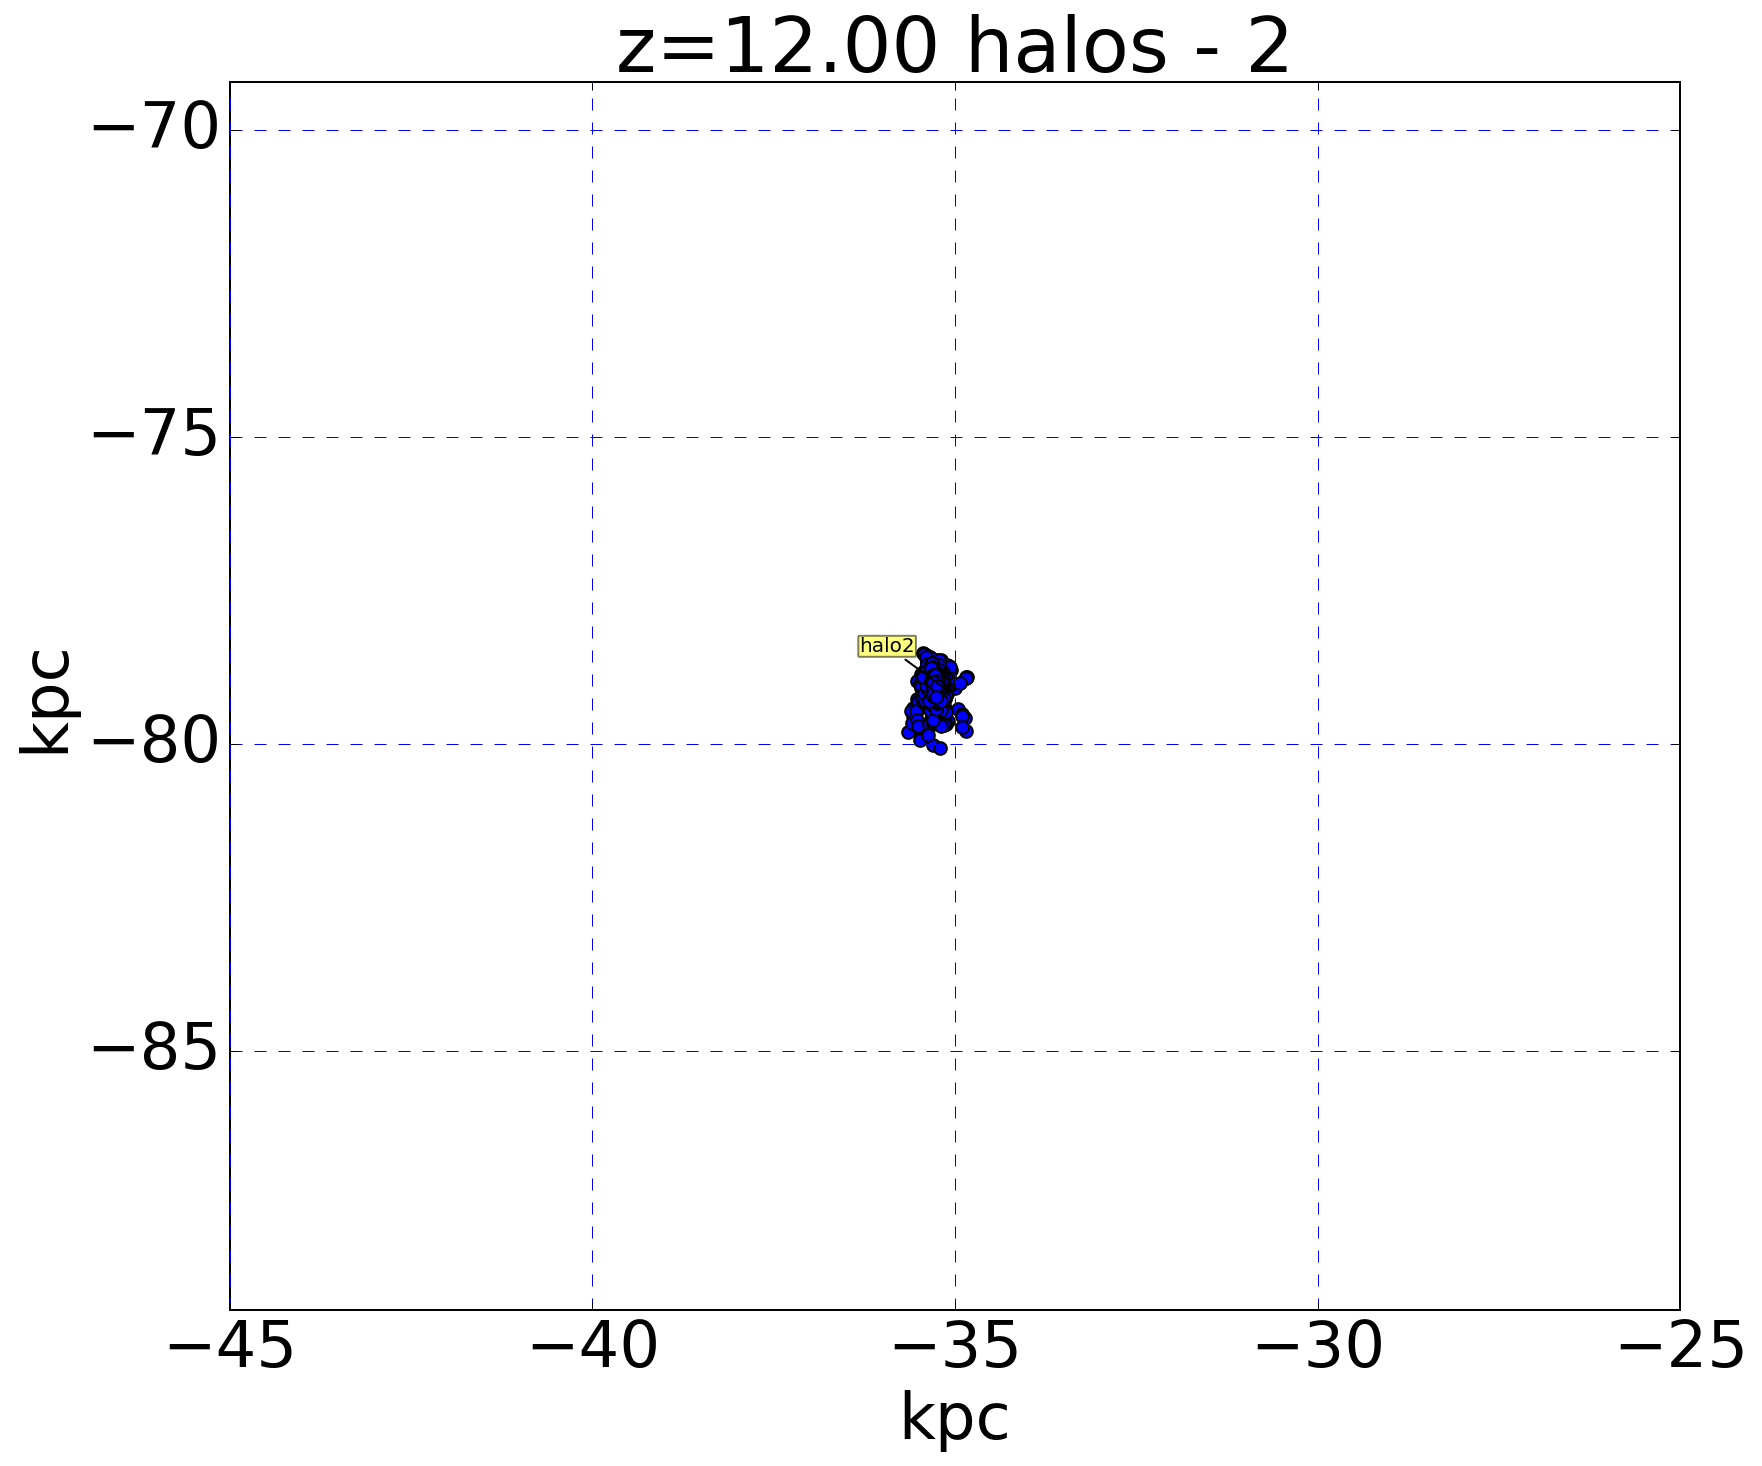

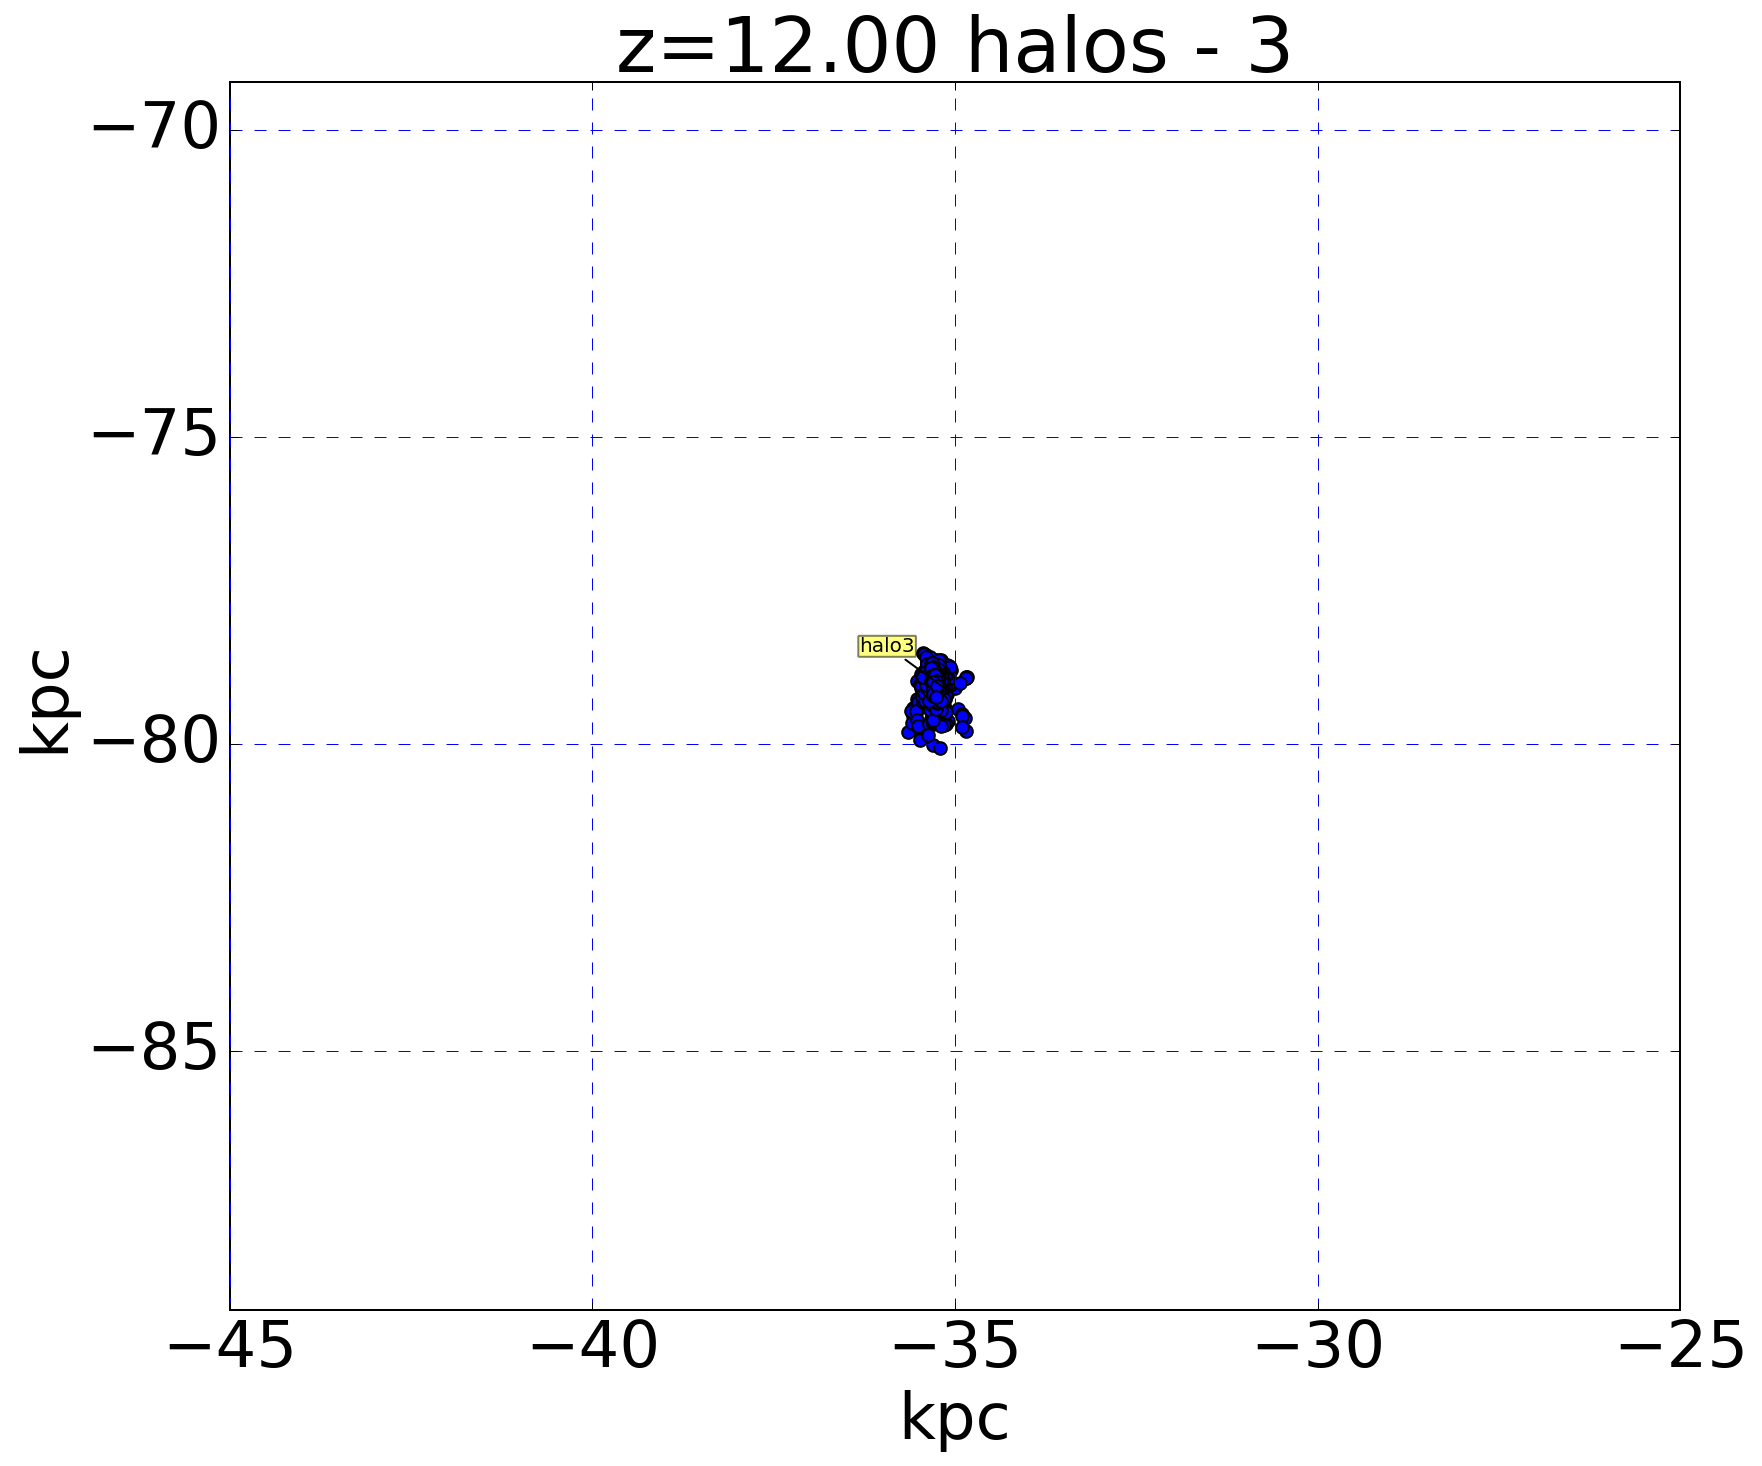

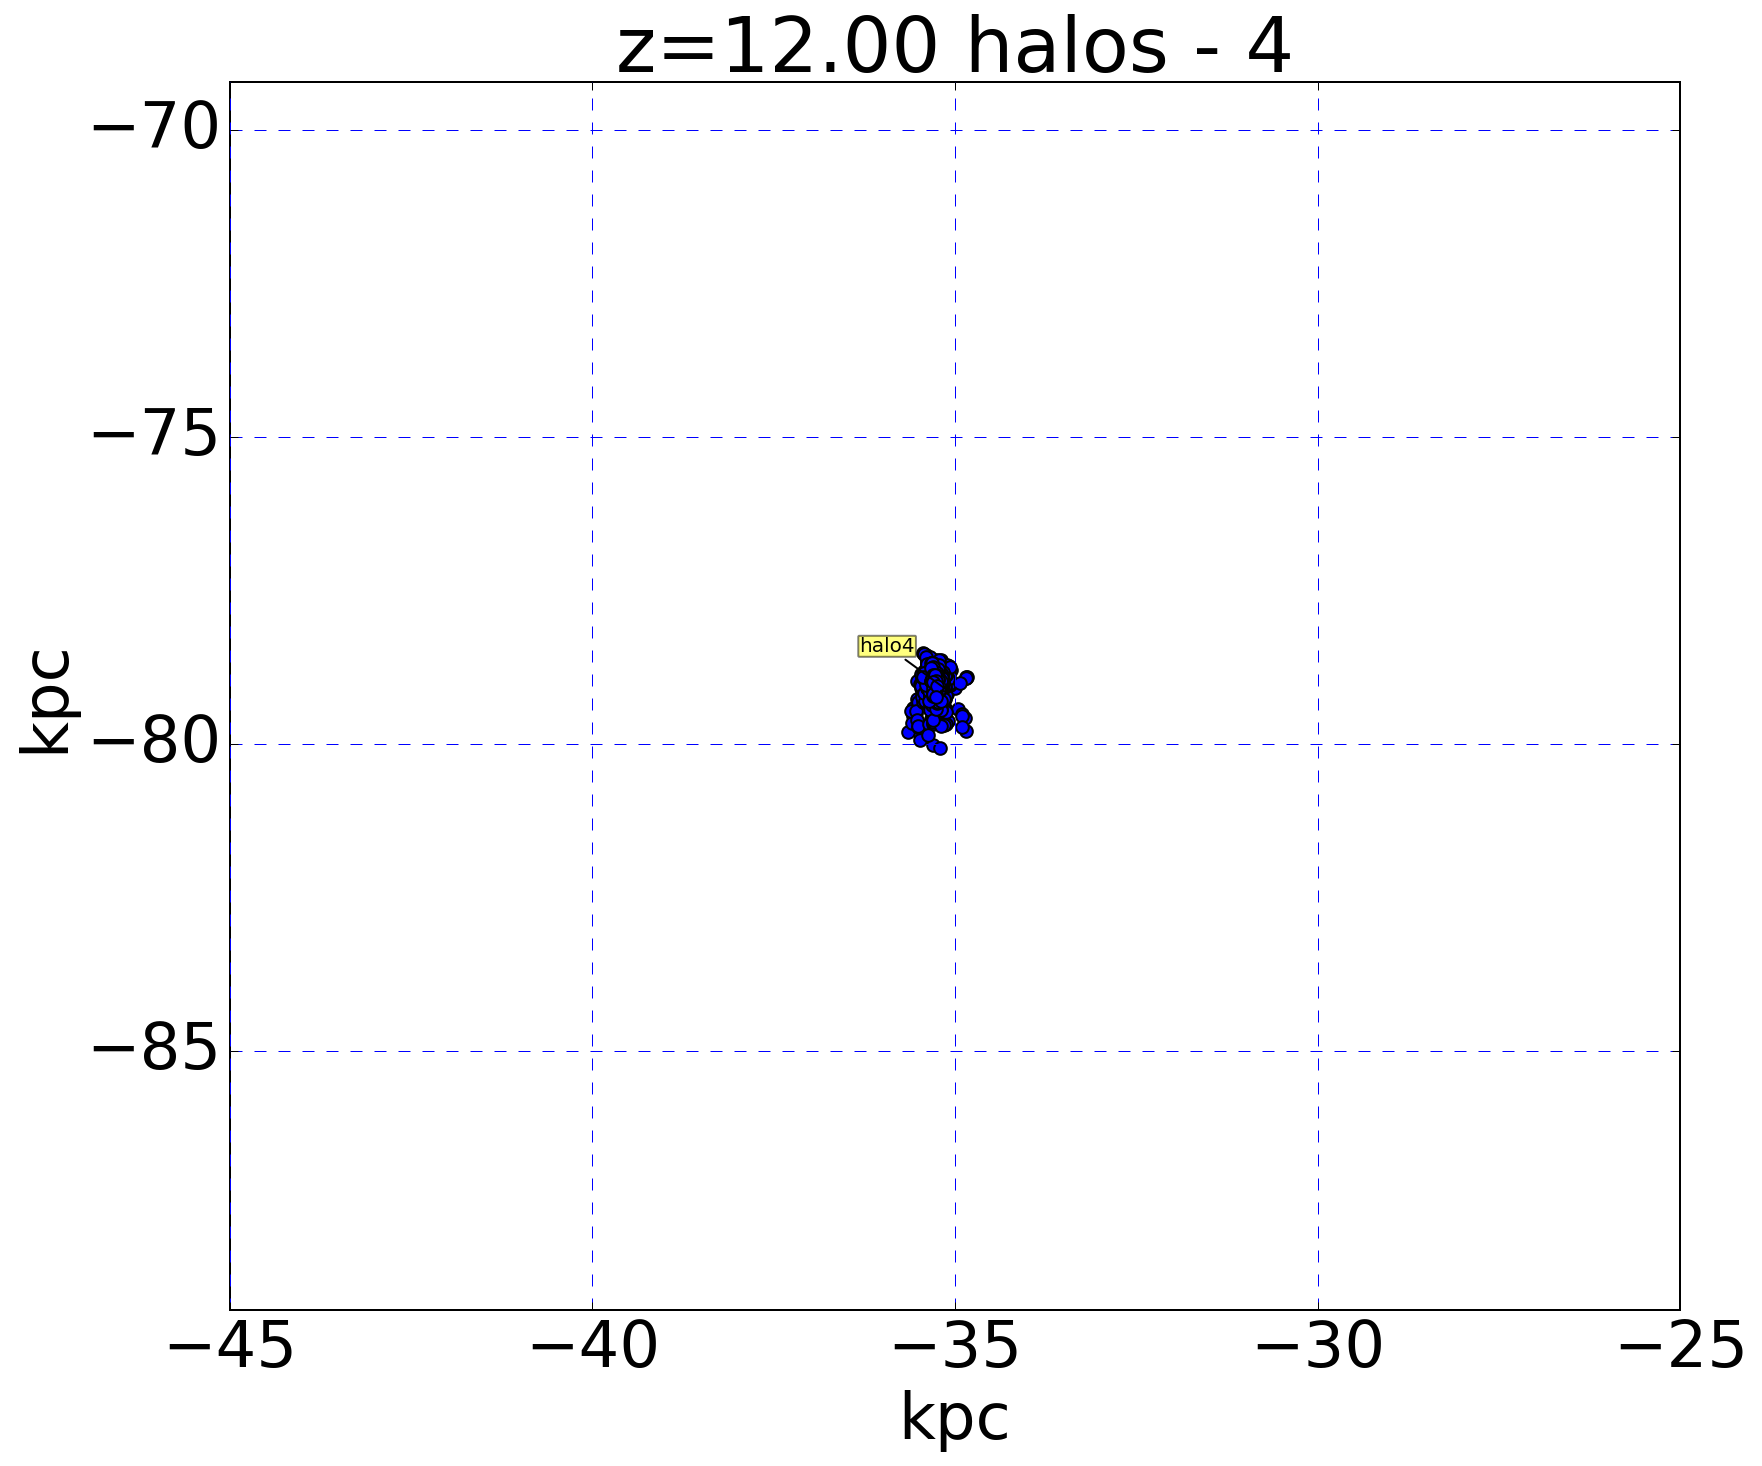

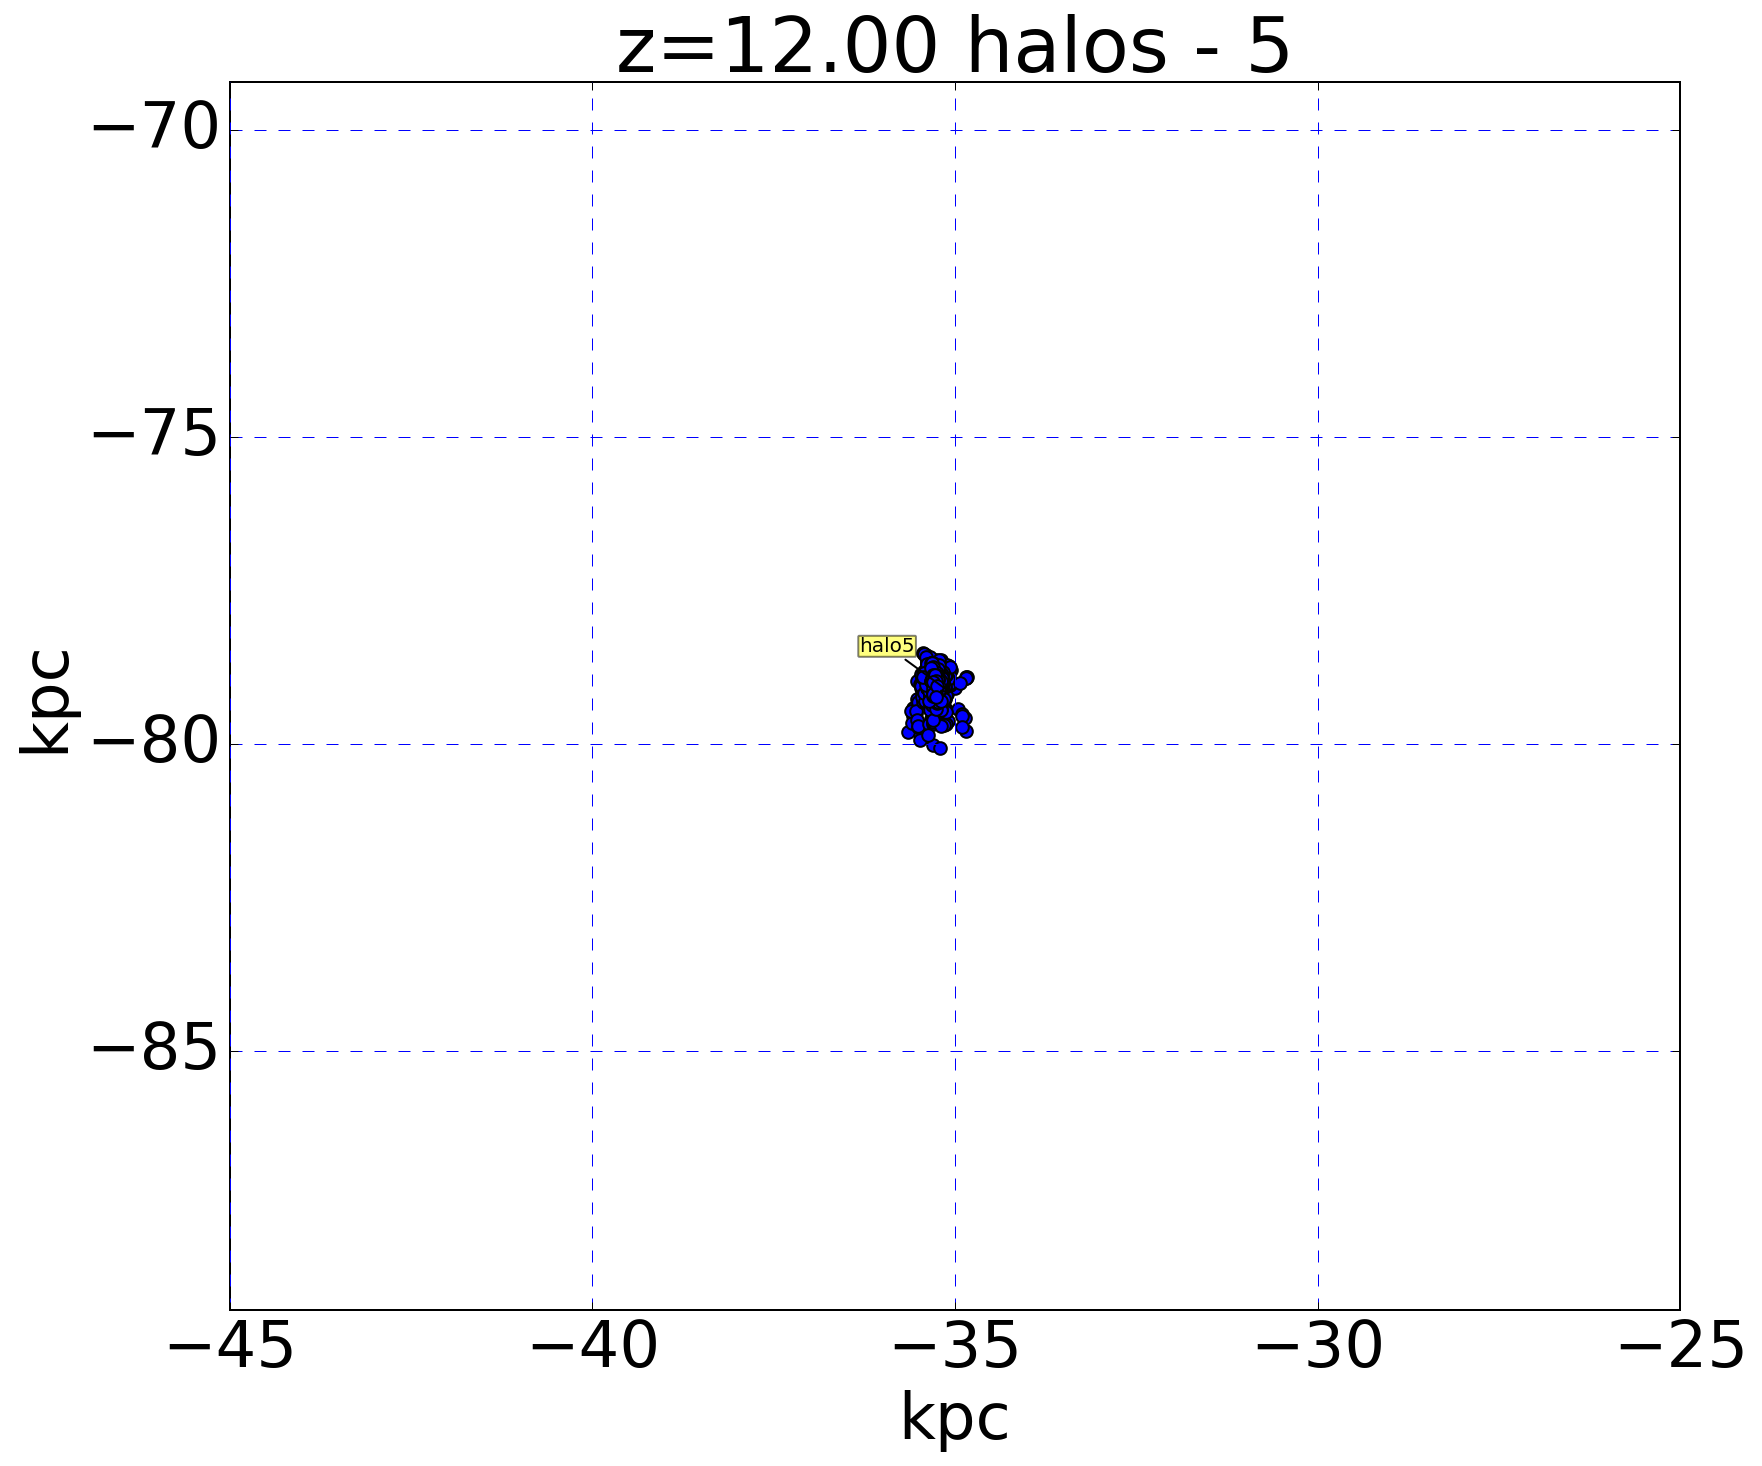

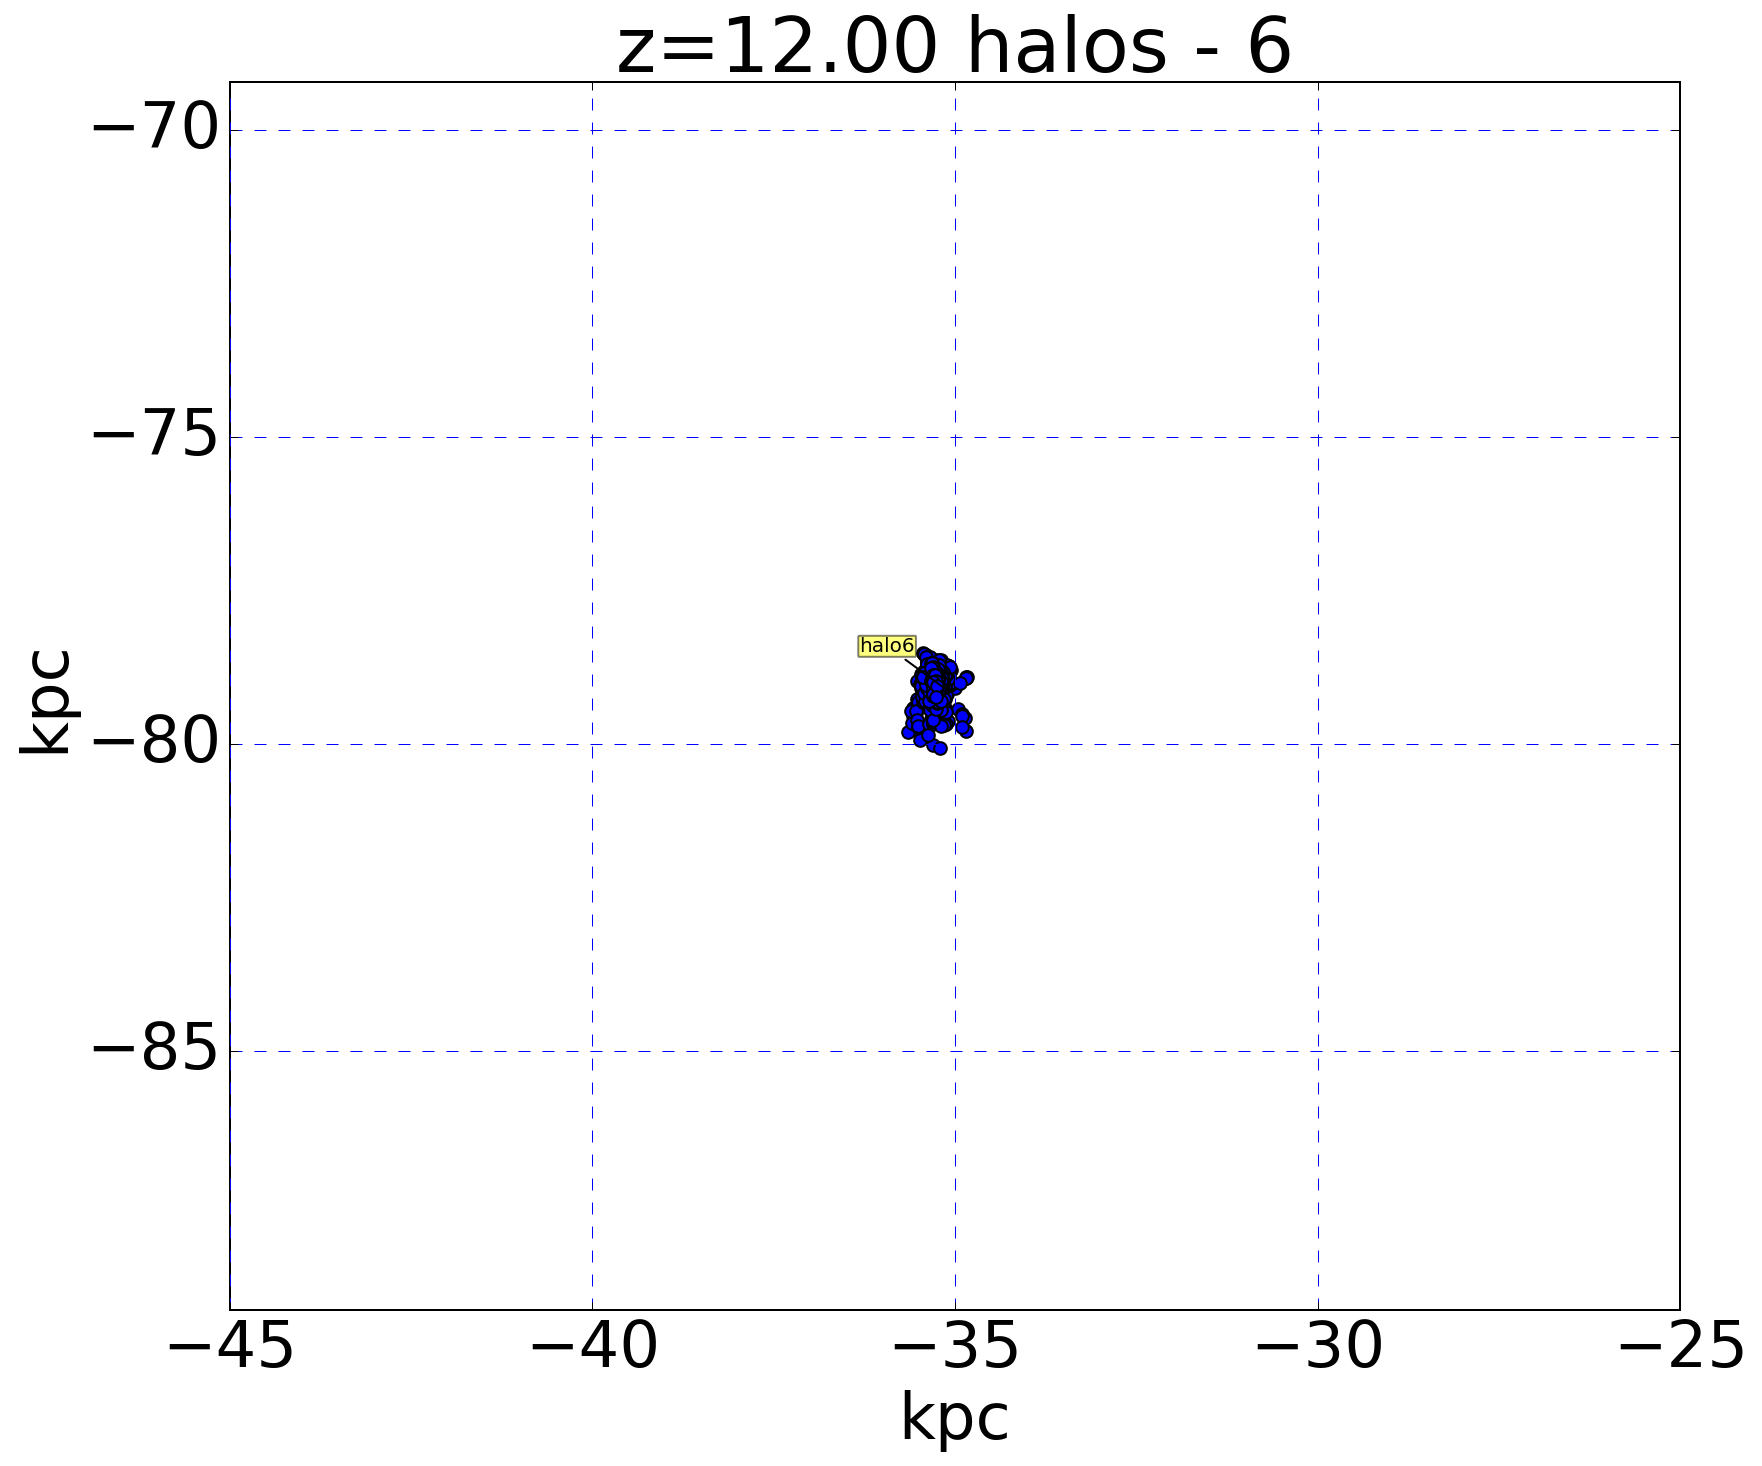

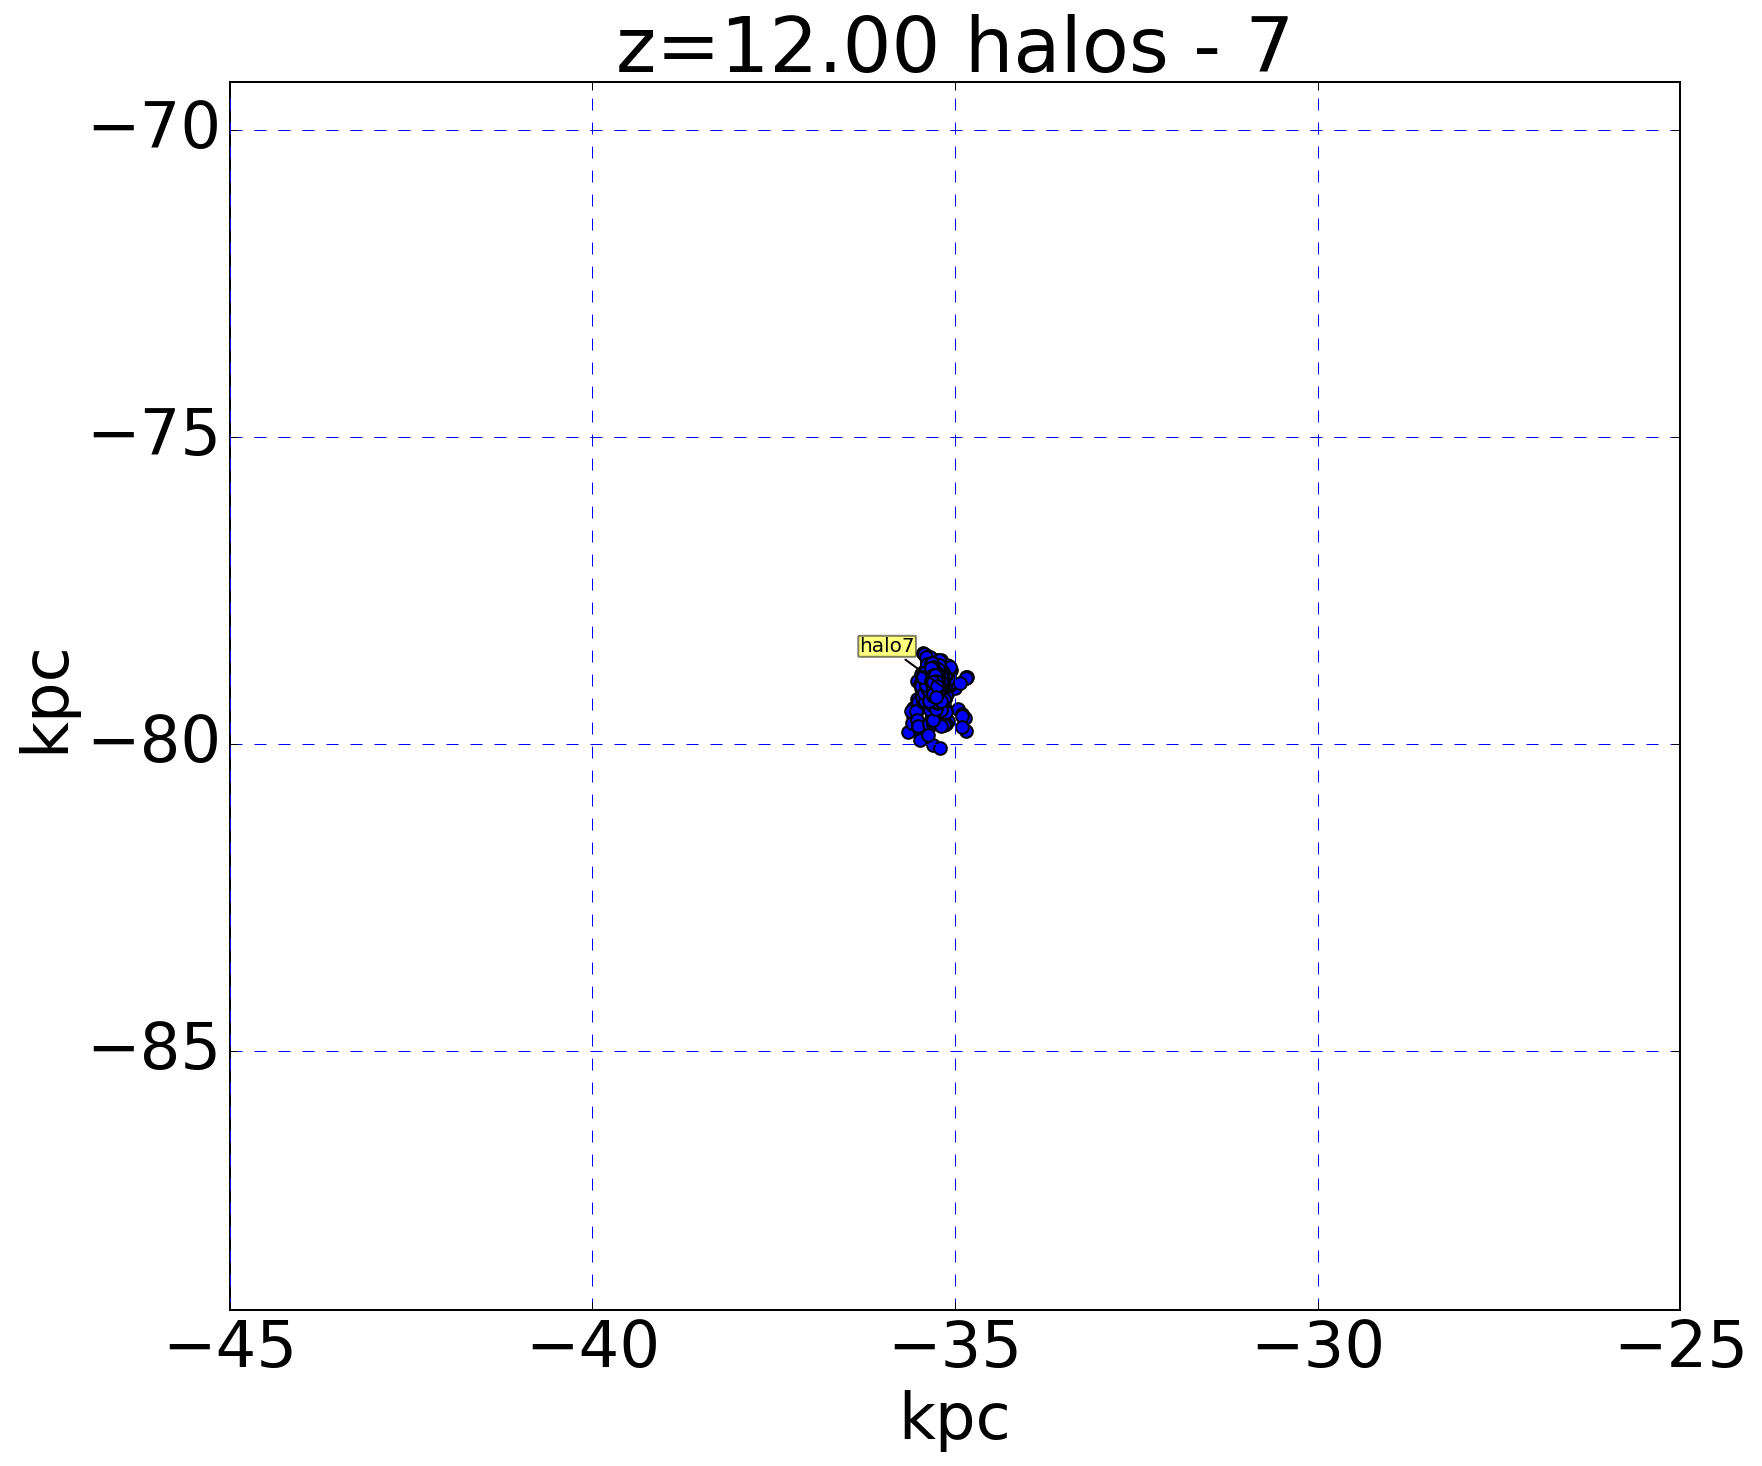

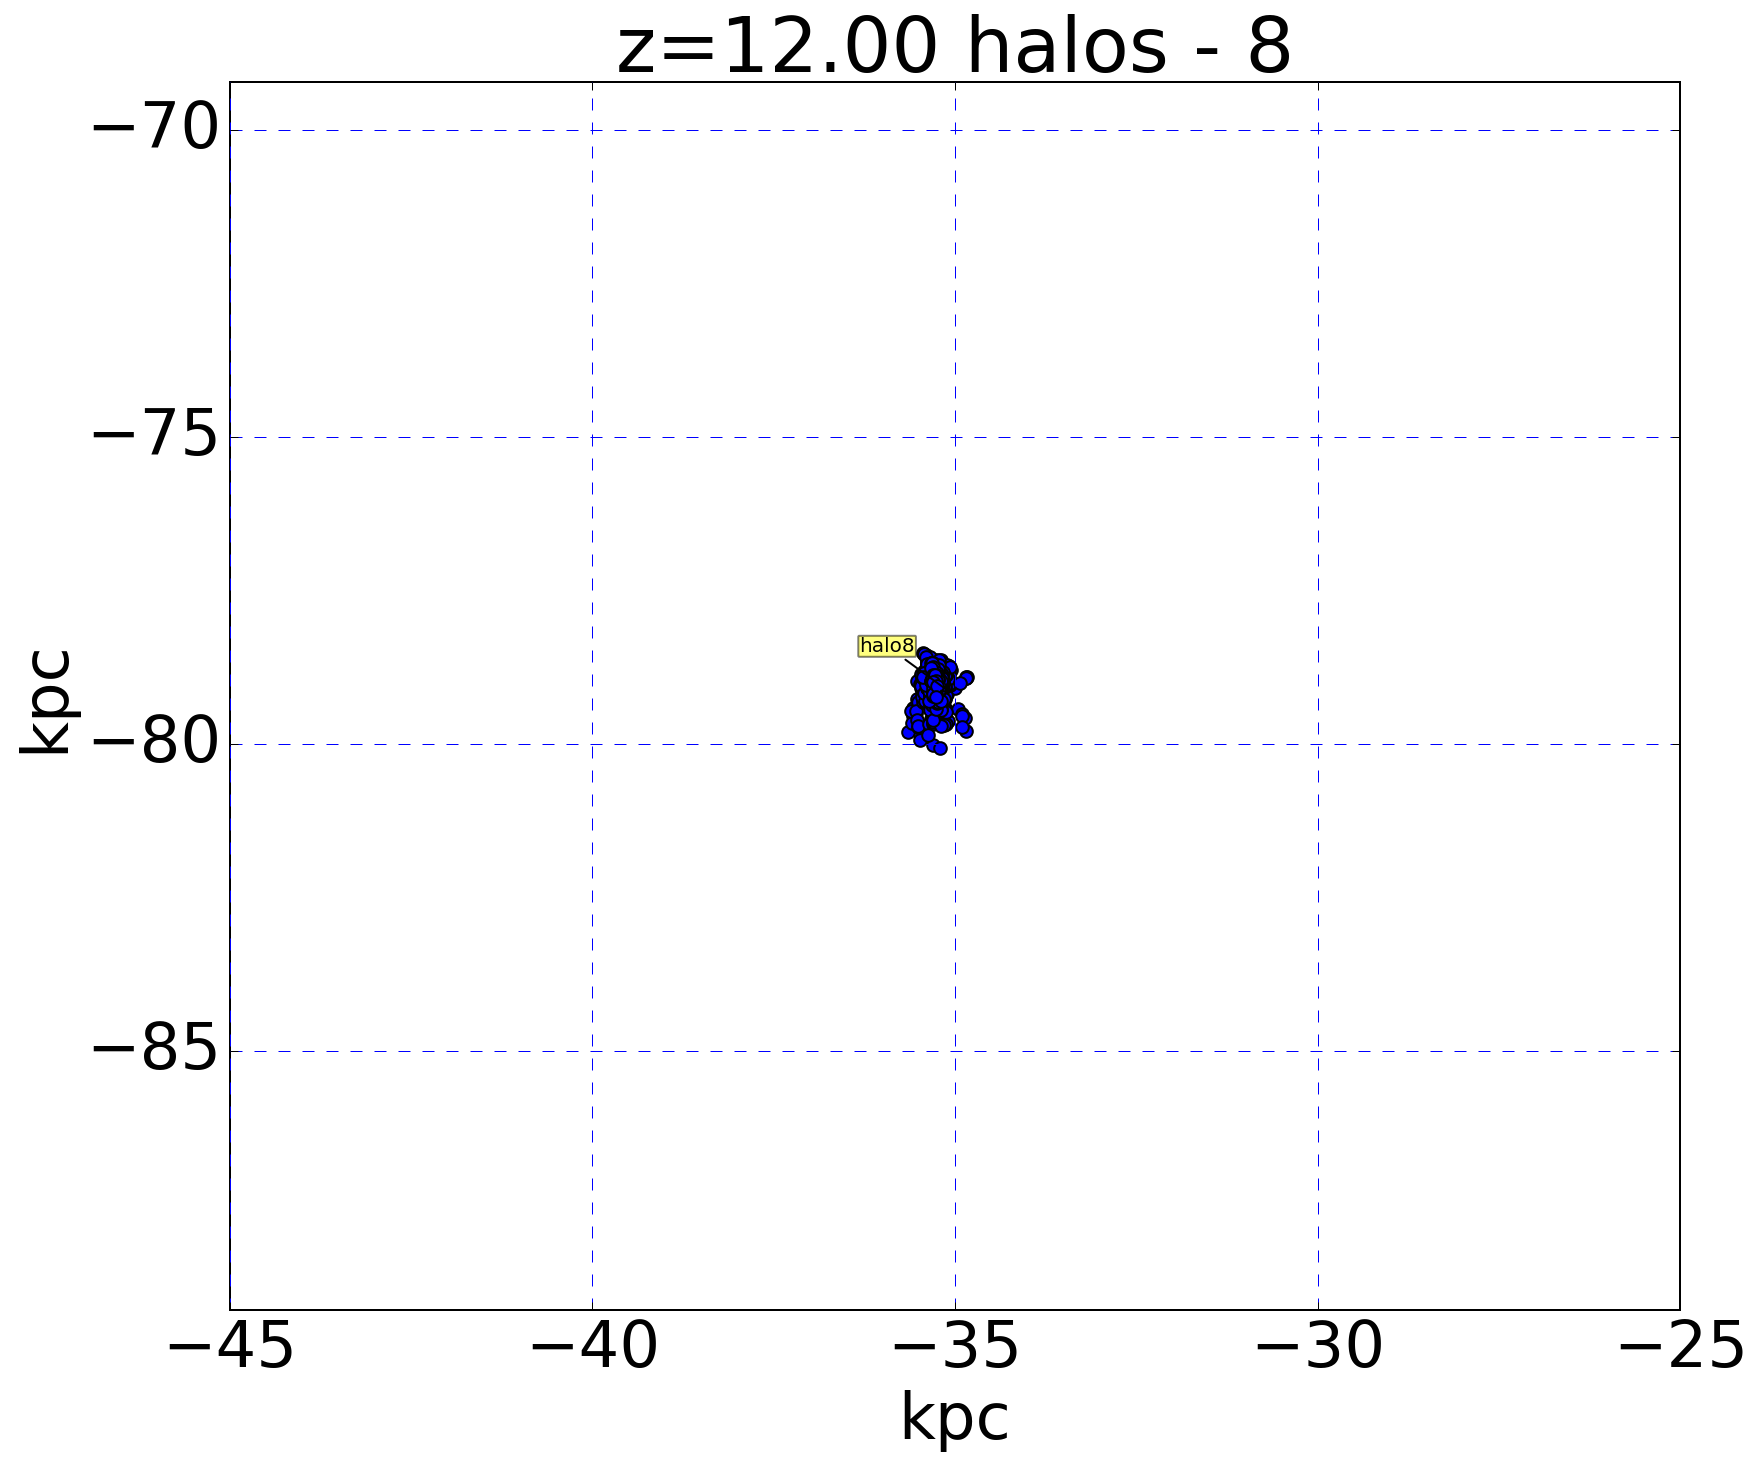

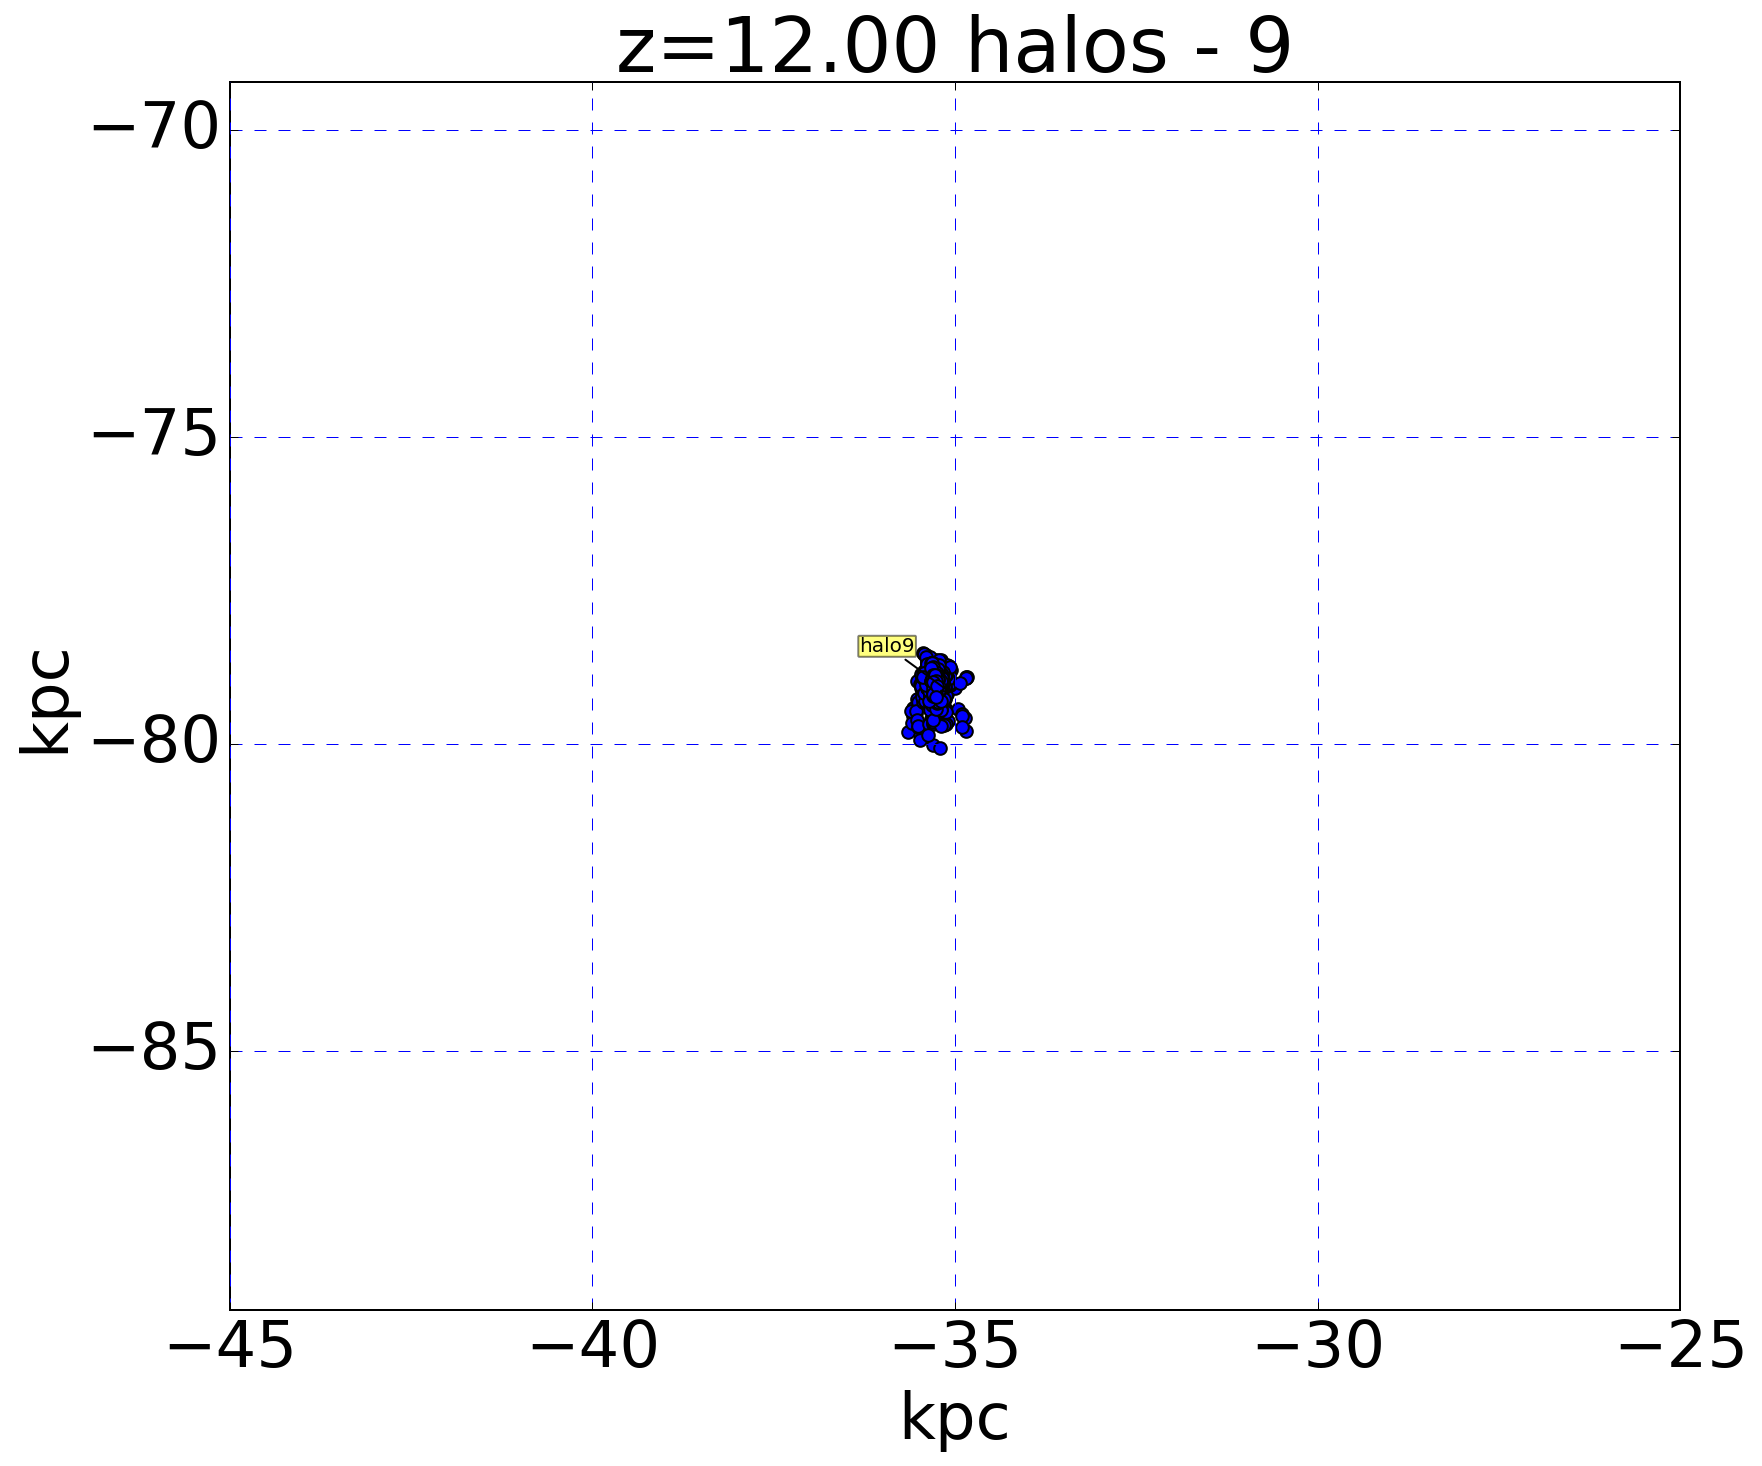

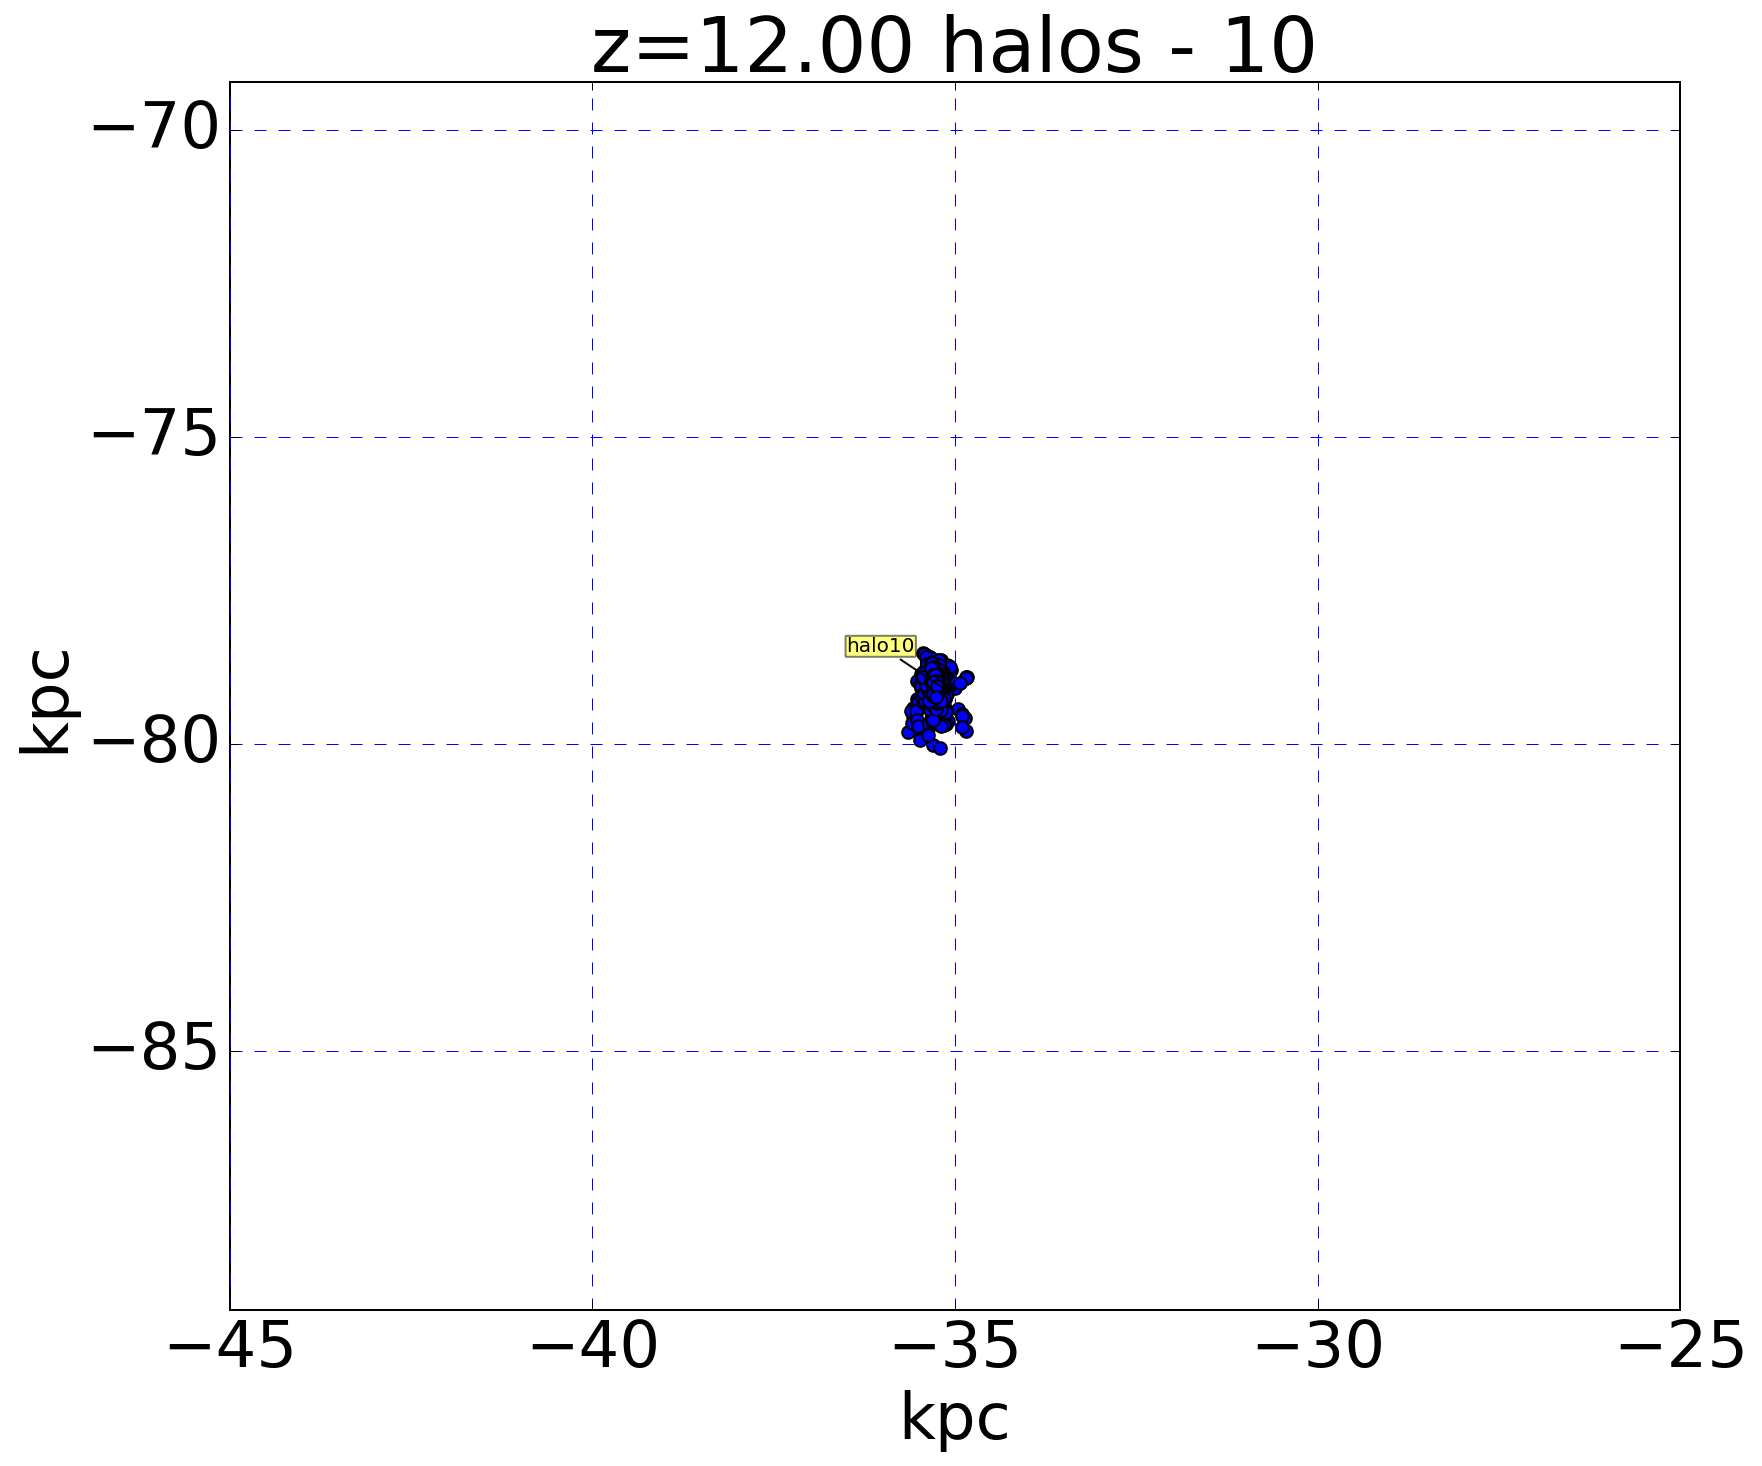

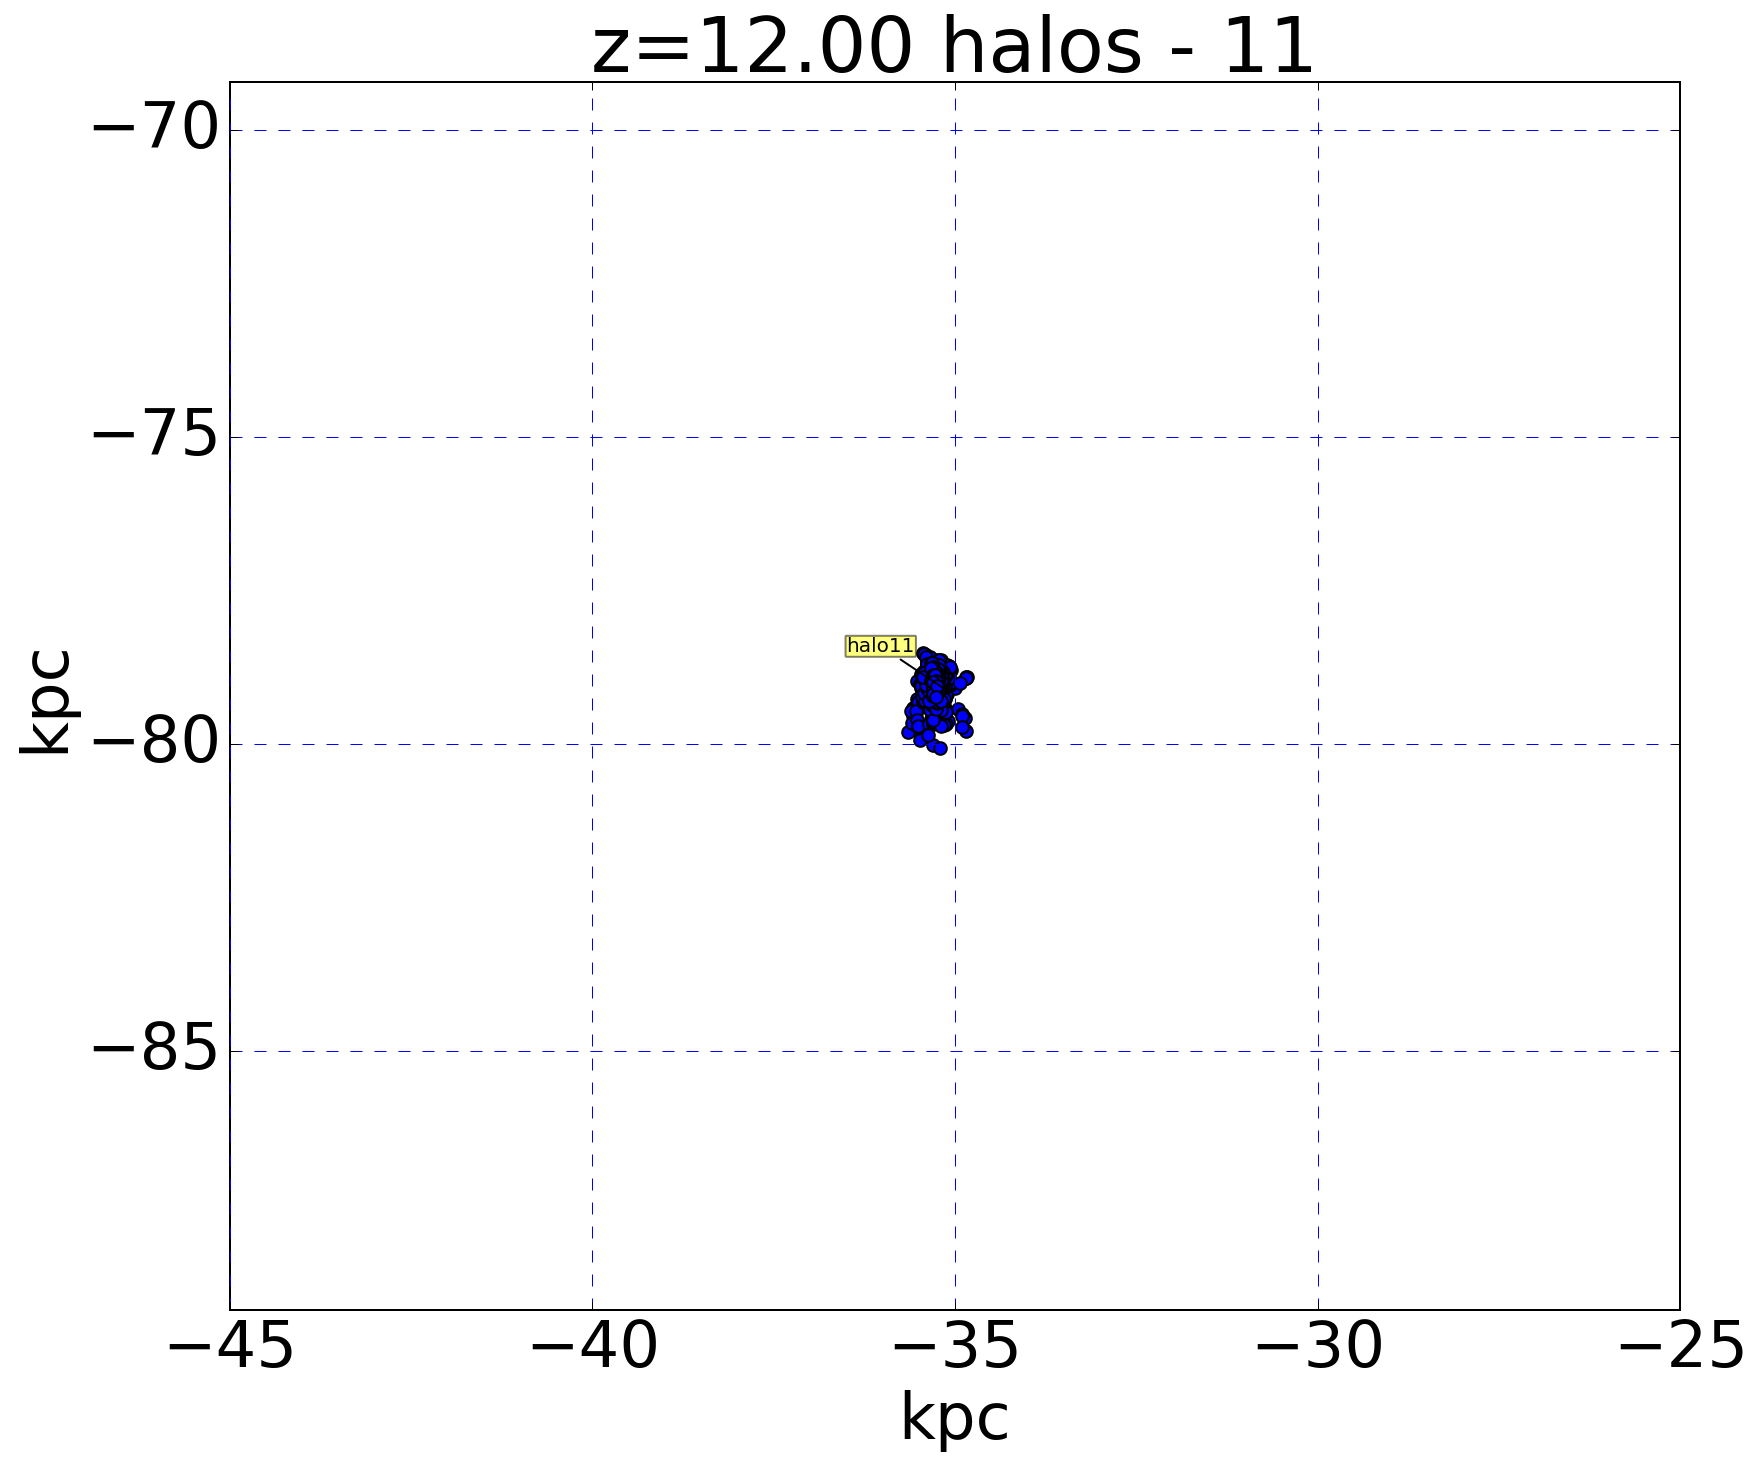

In [294]:
for halo in range(0,12):
    htp = 50
    label = 'halo{0}'.format(halo)
    plt.scatter(locs[:,0],locs[:,1],s=40,c='b') # Plot star particles
    plt.scatter(halosPos[halo,0],halosPos[halo,1],s=120,facecolors='none', edgecolors='r') # Plot halo locs
    plt.grid(b=True, which='major', color='b', linestyle='--')
    plt.xlabel('kpc')
    plt.ylabel('kpc')
    plt.title('z=%.2lf halos - %d'%(z,halo))
    plt.xlim([halosPos[0,0]-10,halosPos[0,0]+10])
    plt.ylim([halosPos[0,1]-10,halosPos[0,1]+10])

    plt.annotate(
        label, 
        xy = (halosPos[0,0], halosPos[0,1]), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.show()

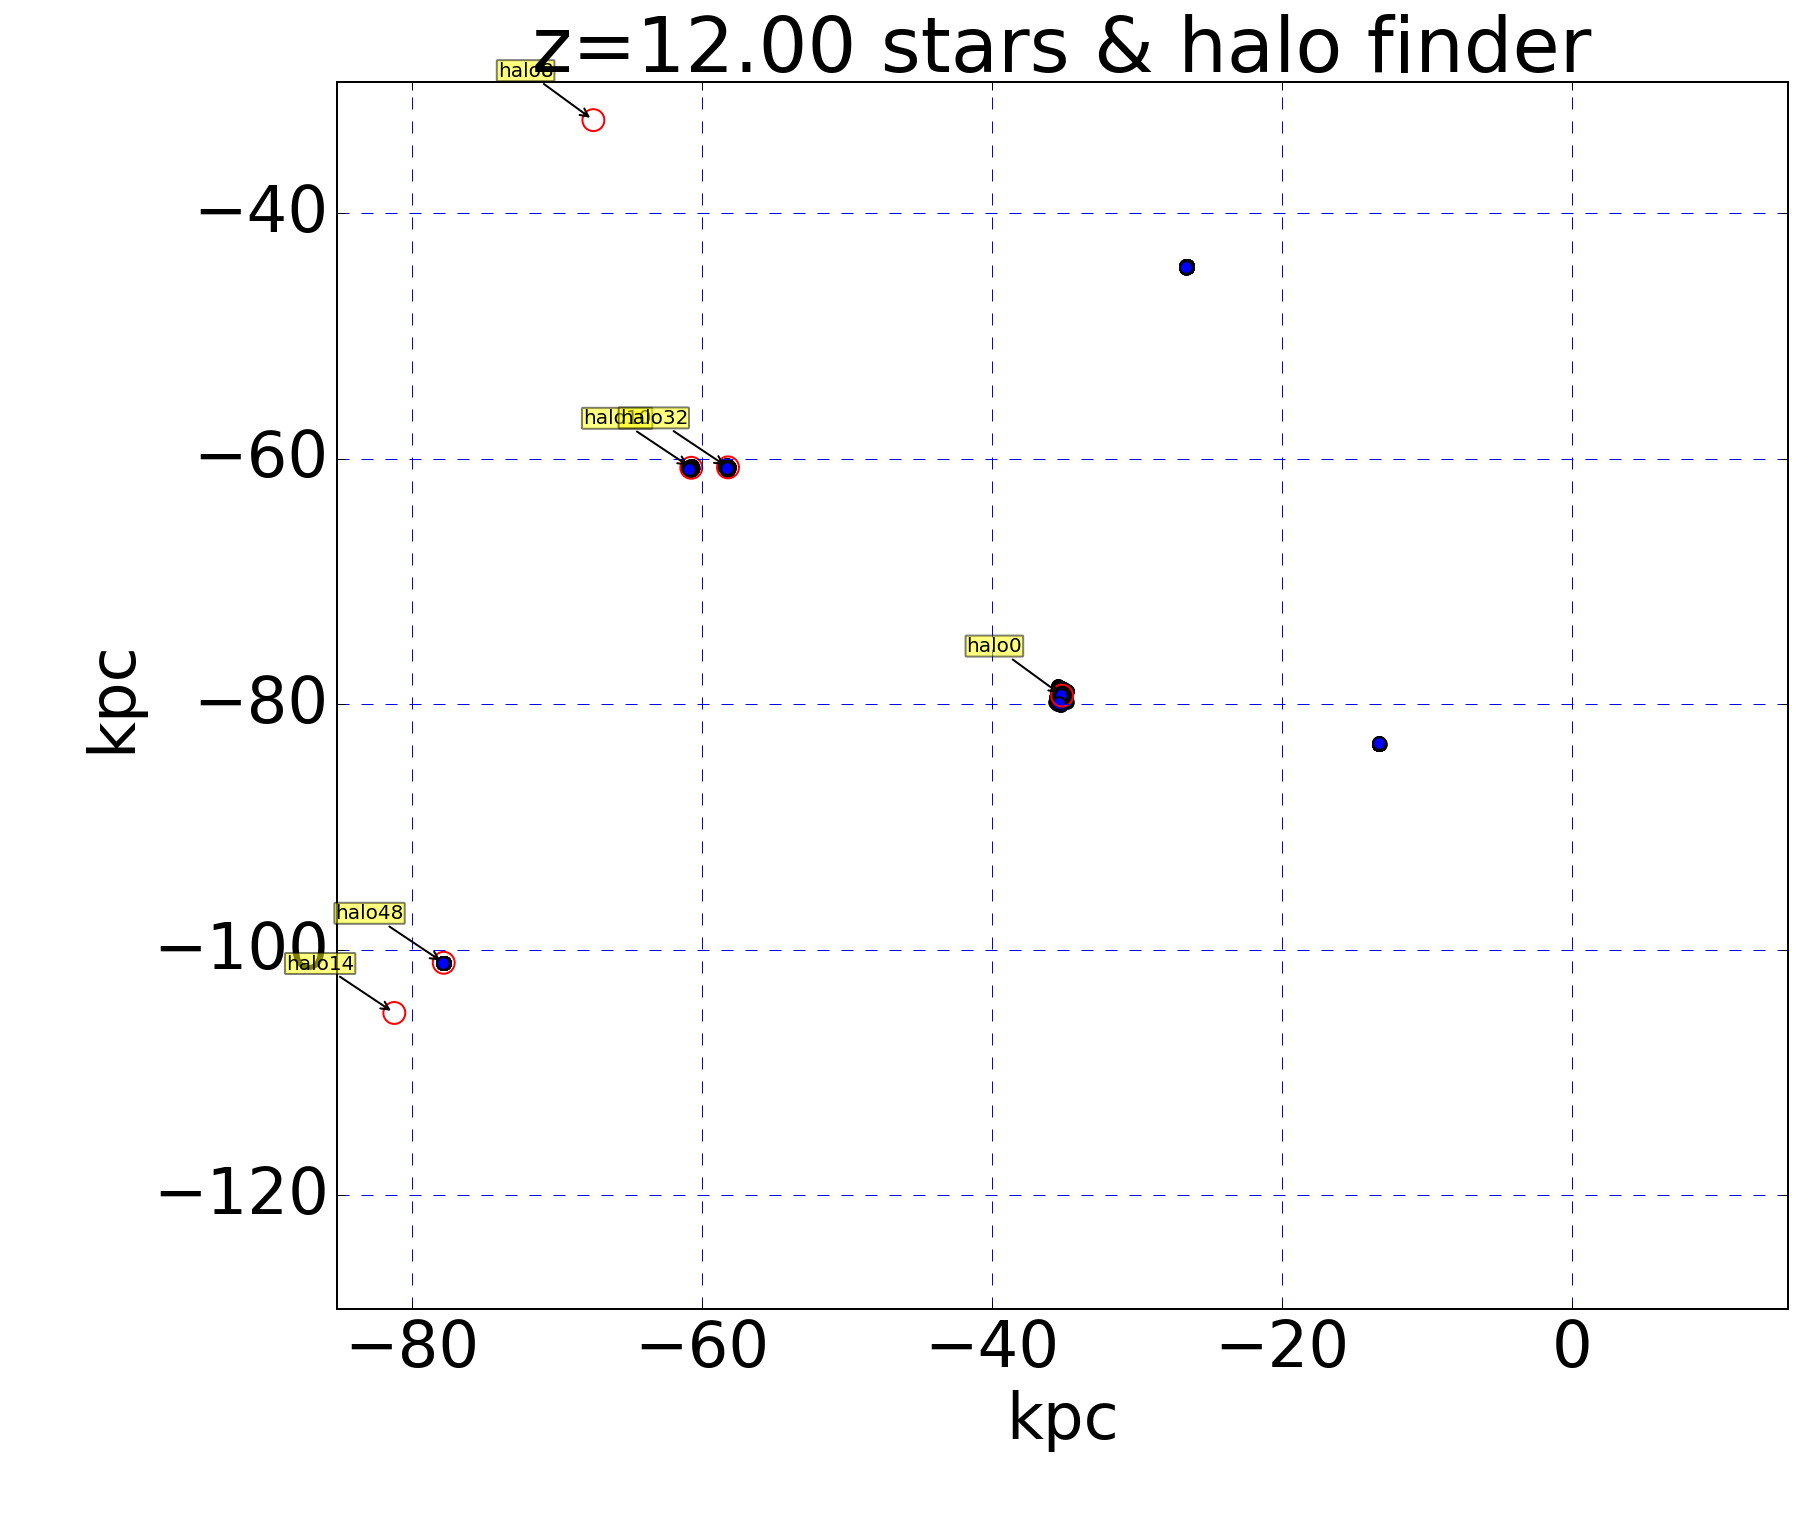

In [263]:
htp = 50
labels = ['halo{0}'.format(i) for i in range(len(halosRawPos))]
plt.scatter(locs[:,0],locs[:,1],s=40,c='b') # Plot star particles
plt.scatter(halosRawPos[:htp,0],halosRawPos[:htp,1],s=120,facecolors='none', edgecolors='r') # Plot halo locs
plt.grid(b=True, which='major', color='b', linestyle='--')
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.title('z=%.2lf stars & halo finder'%z)
plt.xlim([halosRawPos[0,0]-50,halosRawPos[0,0]+50])
plt.ylim([halosRawPos[0,1]-50,halosRawPos[0,1]+50])

for label, x, y in zip(labels, halosRawPos[:htp,0],halosRawPos[:htp,1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

# To plot star particle locs, we need to center on a halo

In [264]:
haloNum = 0
(rx,ry,rz) = halosRawPos[haloNum]    # Coordinates of the halo of interest
coords     = -halosRawPos[haloNum]   # Used for translating coords... 

In [265]:
# rx,ry,rz are the coords of the halo of interest center
# coords = -(rx,ry,rz)
# translate out points to the center of the halo

s = 10.0                     # Size of a cube (kpc)-- get all stars within it
radius = ma.sqrt(s**2 * 3.0) # Compute a radius that's bigger than a cube with side s

haloLocs = locs + coords
dists = np.linalg.norm(haloLocs,axis=1)

haloStars = haloLocs[dists <= radius]
halomass  = mass[dists <= radius]
haloZ     = Z[dists <= radius]
haloPZ    = PZ[dists <= radius]
haloPPF   = PPF[dists <= radius]

In [240]:
len(haloStars),len(haloZ)

(9389, 9389)

In [241]:
dists[0],haloLocs[0]

(71.862952539339346, array([-11.31348503,  59.32421596, -38.9477394 ]))

In [242]:
len(np.linalg.norm(haloStars,axis=1)[np.linalg.norm(haloStars,axis=1) > 0.5])

501

In [243]:
halofpol = (1-haloPPF)
halofpol[halofpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
haloZf=haloZ/halofpol # This is our Z corrected for f_pol
haloZf[np.isinf(haloZf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
haloZf[np.isnan(haloZf)] = 10**-7.5
haloZf[haloZf<1e-7] = 10**-7.5

haloZ[haloZ<1e-7] = 10**-7.5

haloPZf=haloPZ/halofpol
haloPZf[np.isinf(haloPZf)] = 10**-7.5
haloPZf[np.isnan(haloPZf)] = 10**-7.5
haloPZf[haloPZf<1e-7] = 10**-7.5

haloPZ[haloPZ<1e-7] = 10**-7.5

haloPPF[haloPPF<1e-7] = 10**-7.5

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide


In [244]:
# Pick out stars by metallicity range... 
rng1 = (haloZ < 1.e-5)
rng2 = ((haloZ >= 1.e-5) & (haloZ < 1.e-3))
rng3 = ((haloZ >= 1.e-3) & (haloZ < 1.e-1))
rng4 = (haloZ >= 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (haloZf < 1.e-5)
rngf2 = ((haloZf >= 1.e-5) & (haloZf < 1.e-3))
rngf3 = ((haloZf >= 1.e-3) & (haloZf < 1.e-1))
rngf4 = (haloZf >= 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (haloPPF < 1.e-5)
pfrng2 = ((haloPPF >= 1.e-5) & (haloPPF < 1.e-3))
pfrng3 = ((haloPPF >= 1.e-3) & (haloPPF < 1.e-1))
pfrng4 = (haloPPF >= 1.e-1)

pzrng1 = (haloPZ < 1.e-5)
pzrng2 = ((haloPZ >= 1.e-5) & (haloPZ < 1.e-3))
pzrng3 = ((haloPZ >= 1.e-3) & (haloPZ < 1.e-1))
pzrng4 = (haloPZ >= 1.e-1)

pzrngf1 = (haloPZf < 1.e-5)
pzrngf2 = ((haloPZf >= 1.e-5) & (haloPZf < 1.e-3))
pzrngf3 = ((haloPZf >= 1.e-3) & (haloPZf < 1.e-1))
pzrngf4 = (haloPZf >= 1.e-1)

In [245]:
z1=np.log10(haloZ[rng1])
z2=np.log10(haloZ[rng2])
z3=np.log10(haloZ[rng3])
z4=np.log10(haloZ[rng4])

zf1=np.log10(haloZf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(haloZf[rngf2])
zf3=np.log10(haloZf[rngf3])
zf4=np.log10(haloZf[rngf4])

pf1=np.log10(haloPPF[pfrng1])
pf2=np.log10(haloPPF[pfrng2])
pf3=np.log10(haloPPF[pfrng3])
pf4=np.log10(haloPPF[pfrng4])

pz1=np.log10(haloPZ[pzrng1])
pz2=np.log10(haloPZ[pzrng2])
pz3=np.log10(haloPZ[pzrng3])
pz4=np.log10(haloPZ[pzrng4])

pzf1=np.log10(haloPZf[pzrngf1])
pzf2=np.log10(haloPZf[pzrngf2])
pzf3=np.log10(haloPZf[pzrngf3])
pzf4=np.log10(haloPZf[pzrngf4])

In [246]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(ii) for ii in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [247]:
sbox

4.36923076923077



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


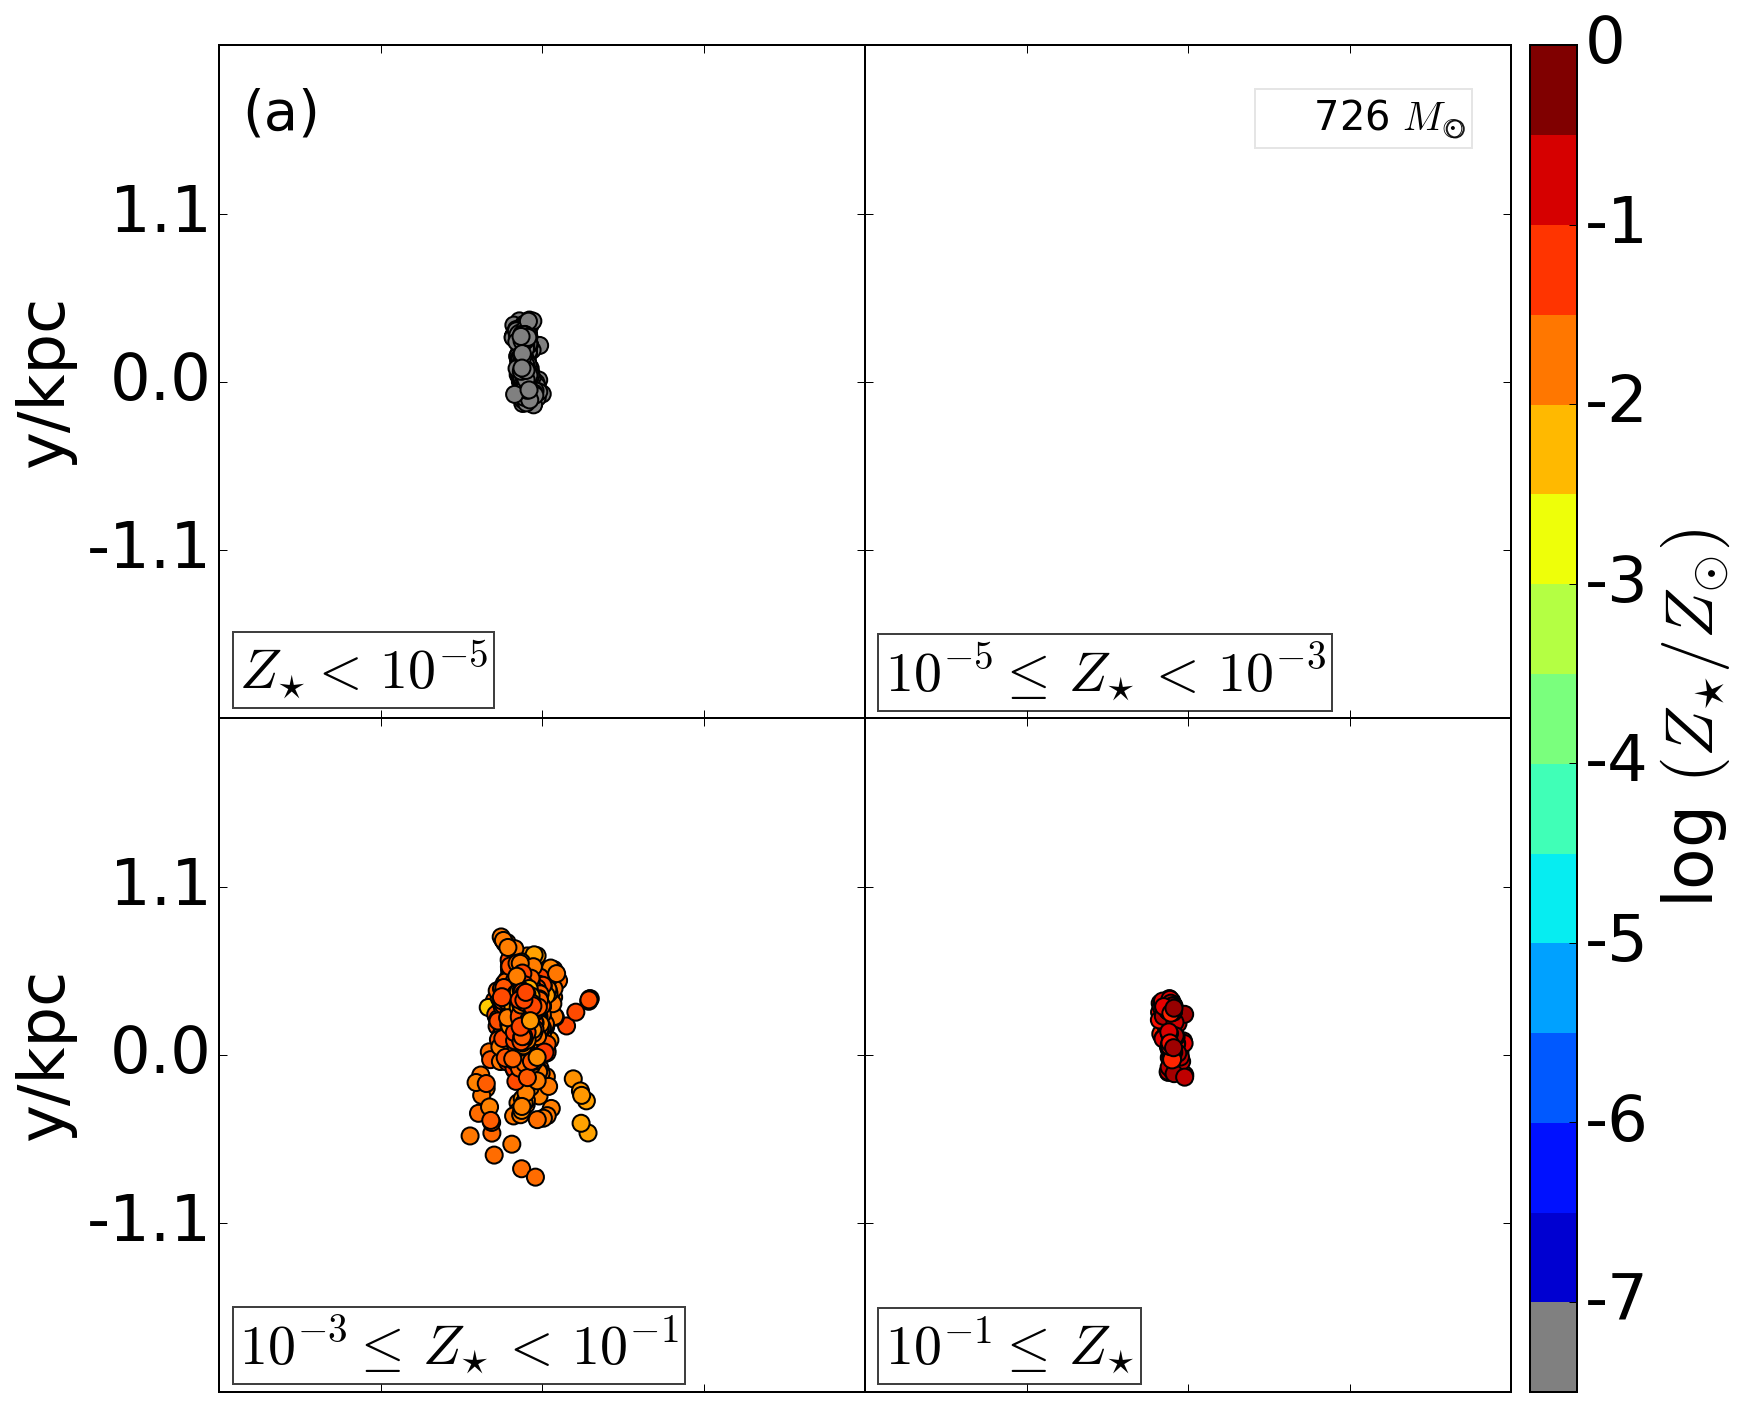

In [279]:
###
### Plot metallicity in 4 subplots
###
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=halomass[rngf1]/dotNorm, c=zf1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=halomass[rngf2]/dotNorm, c=zf2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=halomass[rngf3]/dotNorm, c=zf3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=halomass[rngf4]/dotNorm, c=zf4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')

## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)

bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(0.03,0.025,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize, 
         transform=ax1.transAxes, horizontalalignment='left', verticalalignment='bottom')
ax2.text(0.03,0.04,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',transform=ax2.transAxes,bbox=bbox,fontsize=boxFontSize)
ax3.text(0.03,0.04,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',transform=ax3.transAxes,bbox=bbox,fontsize=boxFontSize)
ax4.text(0.03,0.04,'$10^{-1} \leq\, Z_{\star}\,$',transform=ax4.transAxes,bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(a)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
print(startx,endx)
print(startx-endx)
print(sbox)

tics = [-sbox/4.0,0,sbox/4.0]
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')

xpos = ax2.get_xlim()[1] - 0.15 * ax1.get_xlim()[1]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':4}
ax2.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), horizontalalignment='right', bbox=bbox, size=20)
ax2.scatter(np.array([xpos-xoff]), np.array([ypos+yoff]), s=np.array([min(mass)])/dotNorm,facecolors='none')


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $(Z_{\star}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_Z_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()




(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


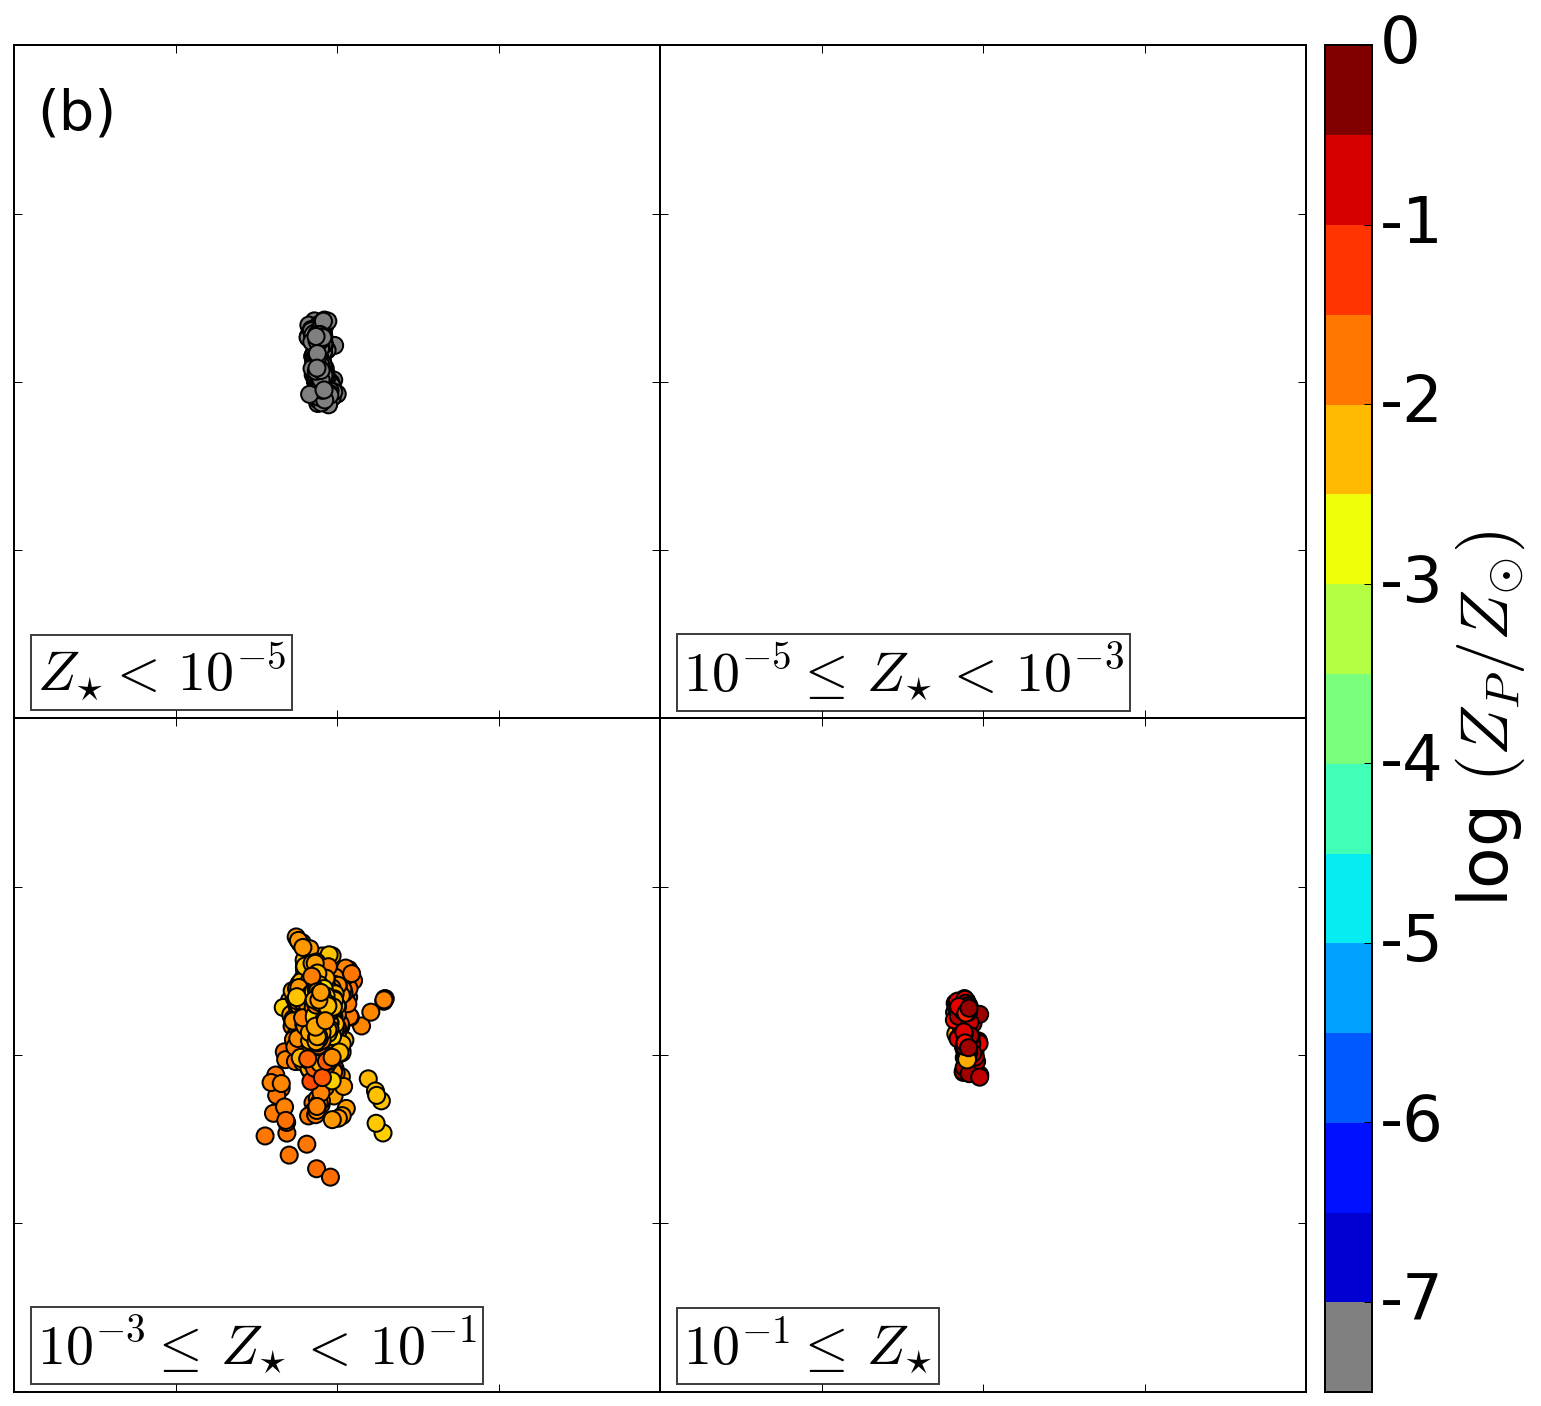

In [256]:
# Color according to Z_P ... but cut on Z/Z_fpol
# Use Z cuts for PPF data... 
z1=np.log10(haloPZf[rngf1])
z2=np.log10(haloPZf[rngf2])
z3=np.log10(haloPZf[rngf3])
z4=np.log10(haloPZf[rngf4])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=halomass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=halomass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=halomass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=halomass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(b)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1

tics = [-sbox/4.0,0,sbox/4.0]
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
print(startx,endx)
print(startx-endx)
print(sbox)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $(Z_{P}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PZ_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


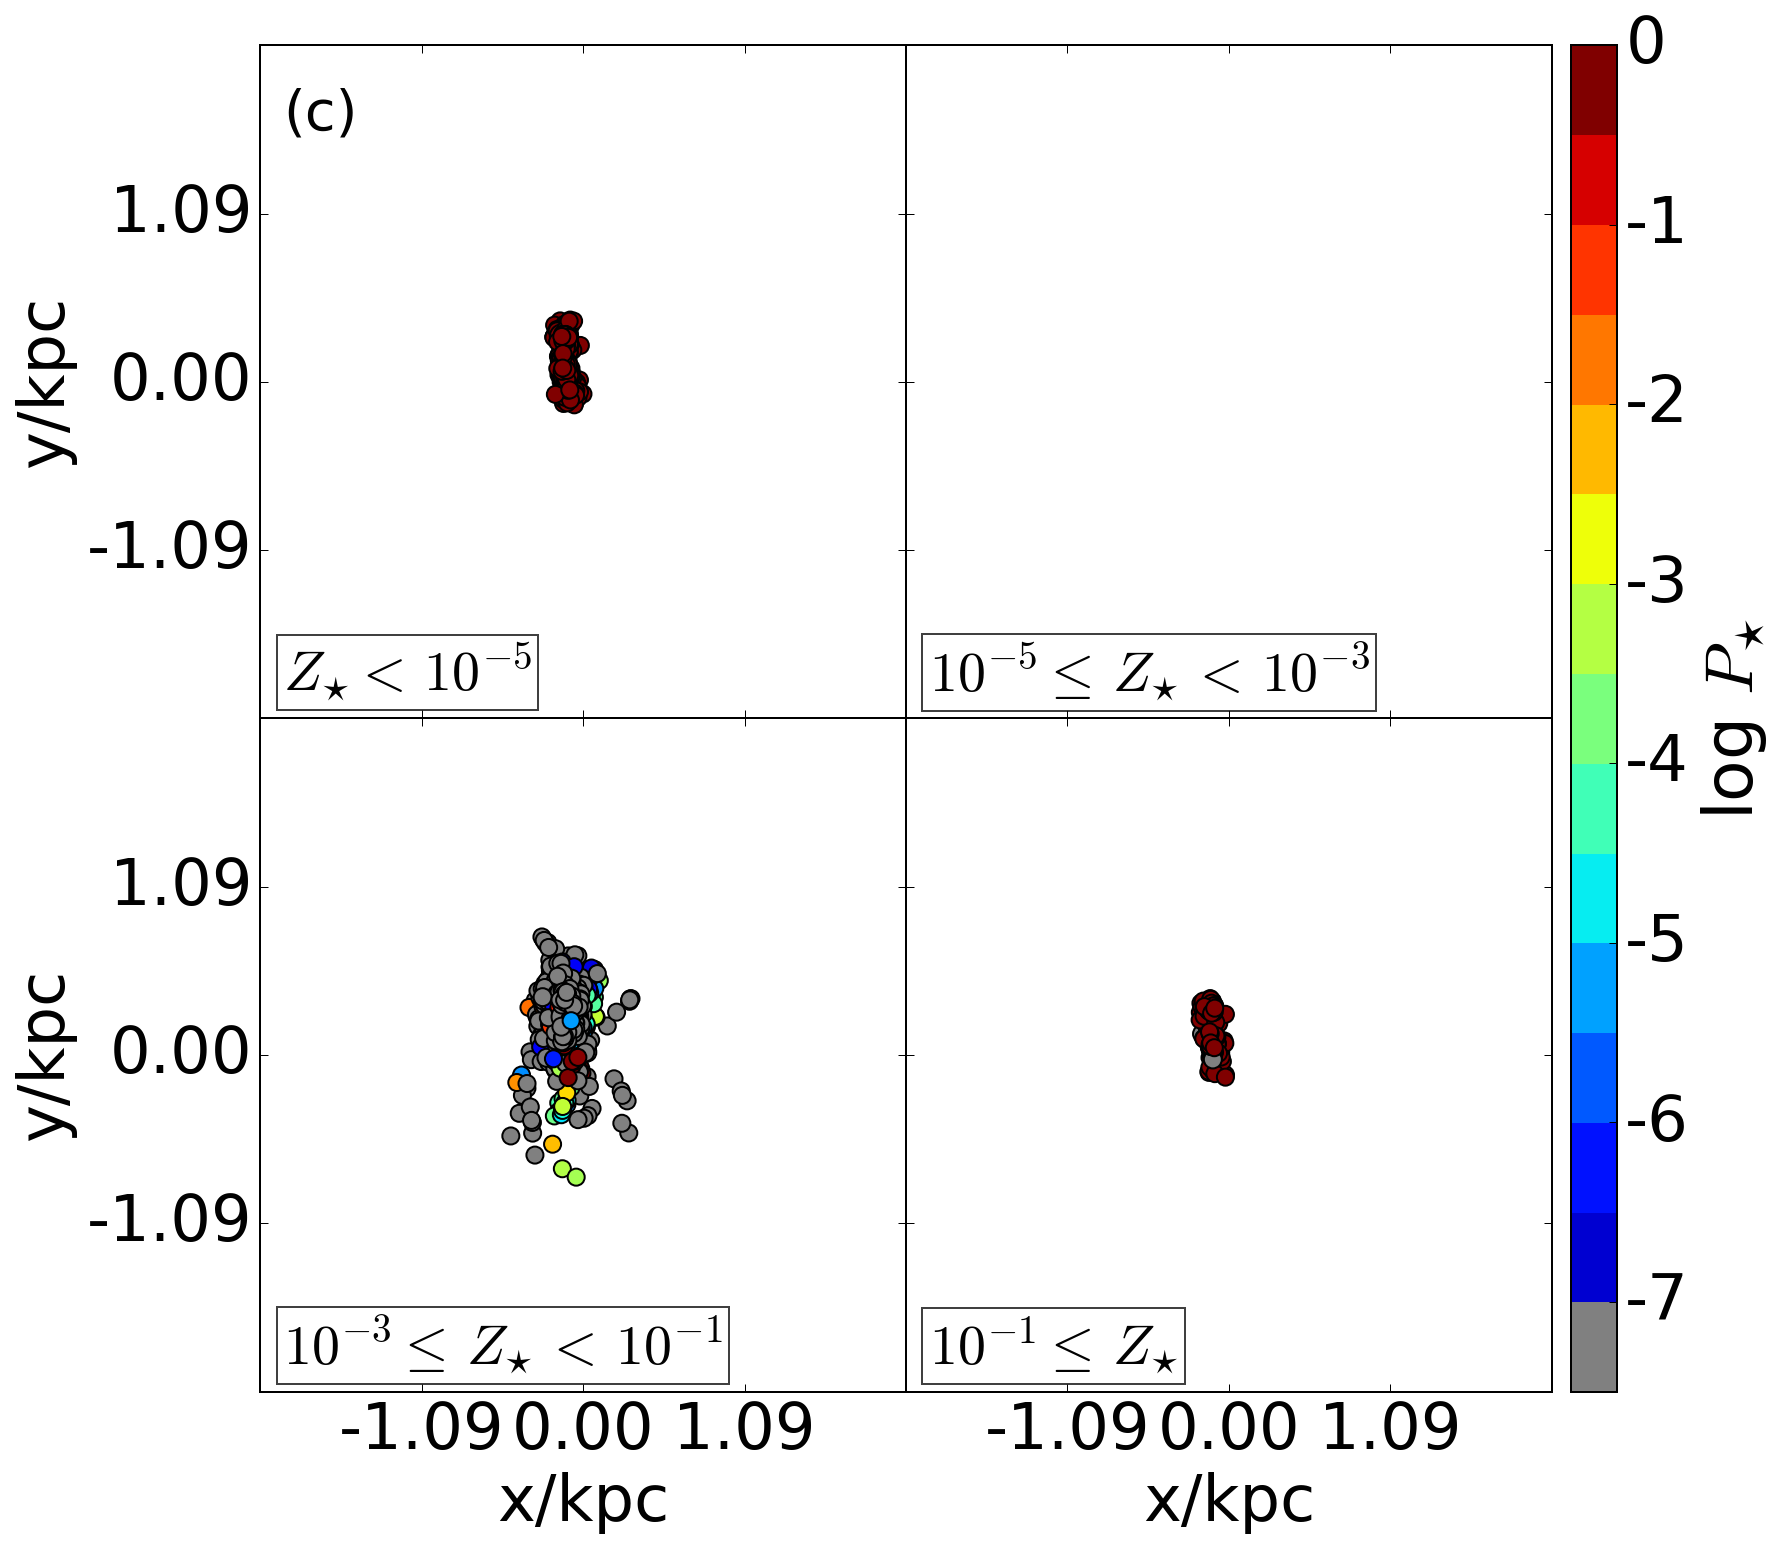

In [257]:
#rng1 = (PPF < 1.e-5)
#rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
#rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
#rng4 = (PPF >= 1.e-1)
# Use Z cuts for PPF data... 
z1=np.log10(haloPPF[rngf1])
z2=np.log10(haloPPF[rngf2])
z3=np.log10(haloPPF[rngf3])
z4=np.log10(haloPPF[rngf4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=halomass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=halomass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=halomass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=halomass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')
print(startx,endx)
print(startx-endx)
print(sbox)


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


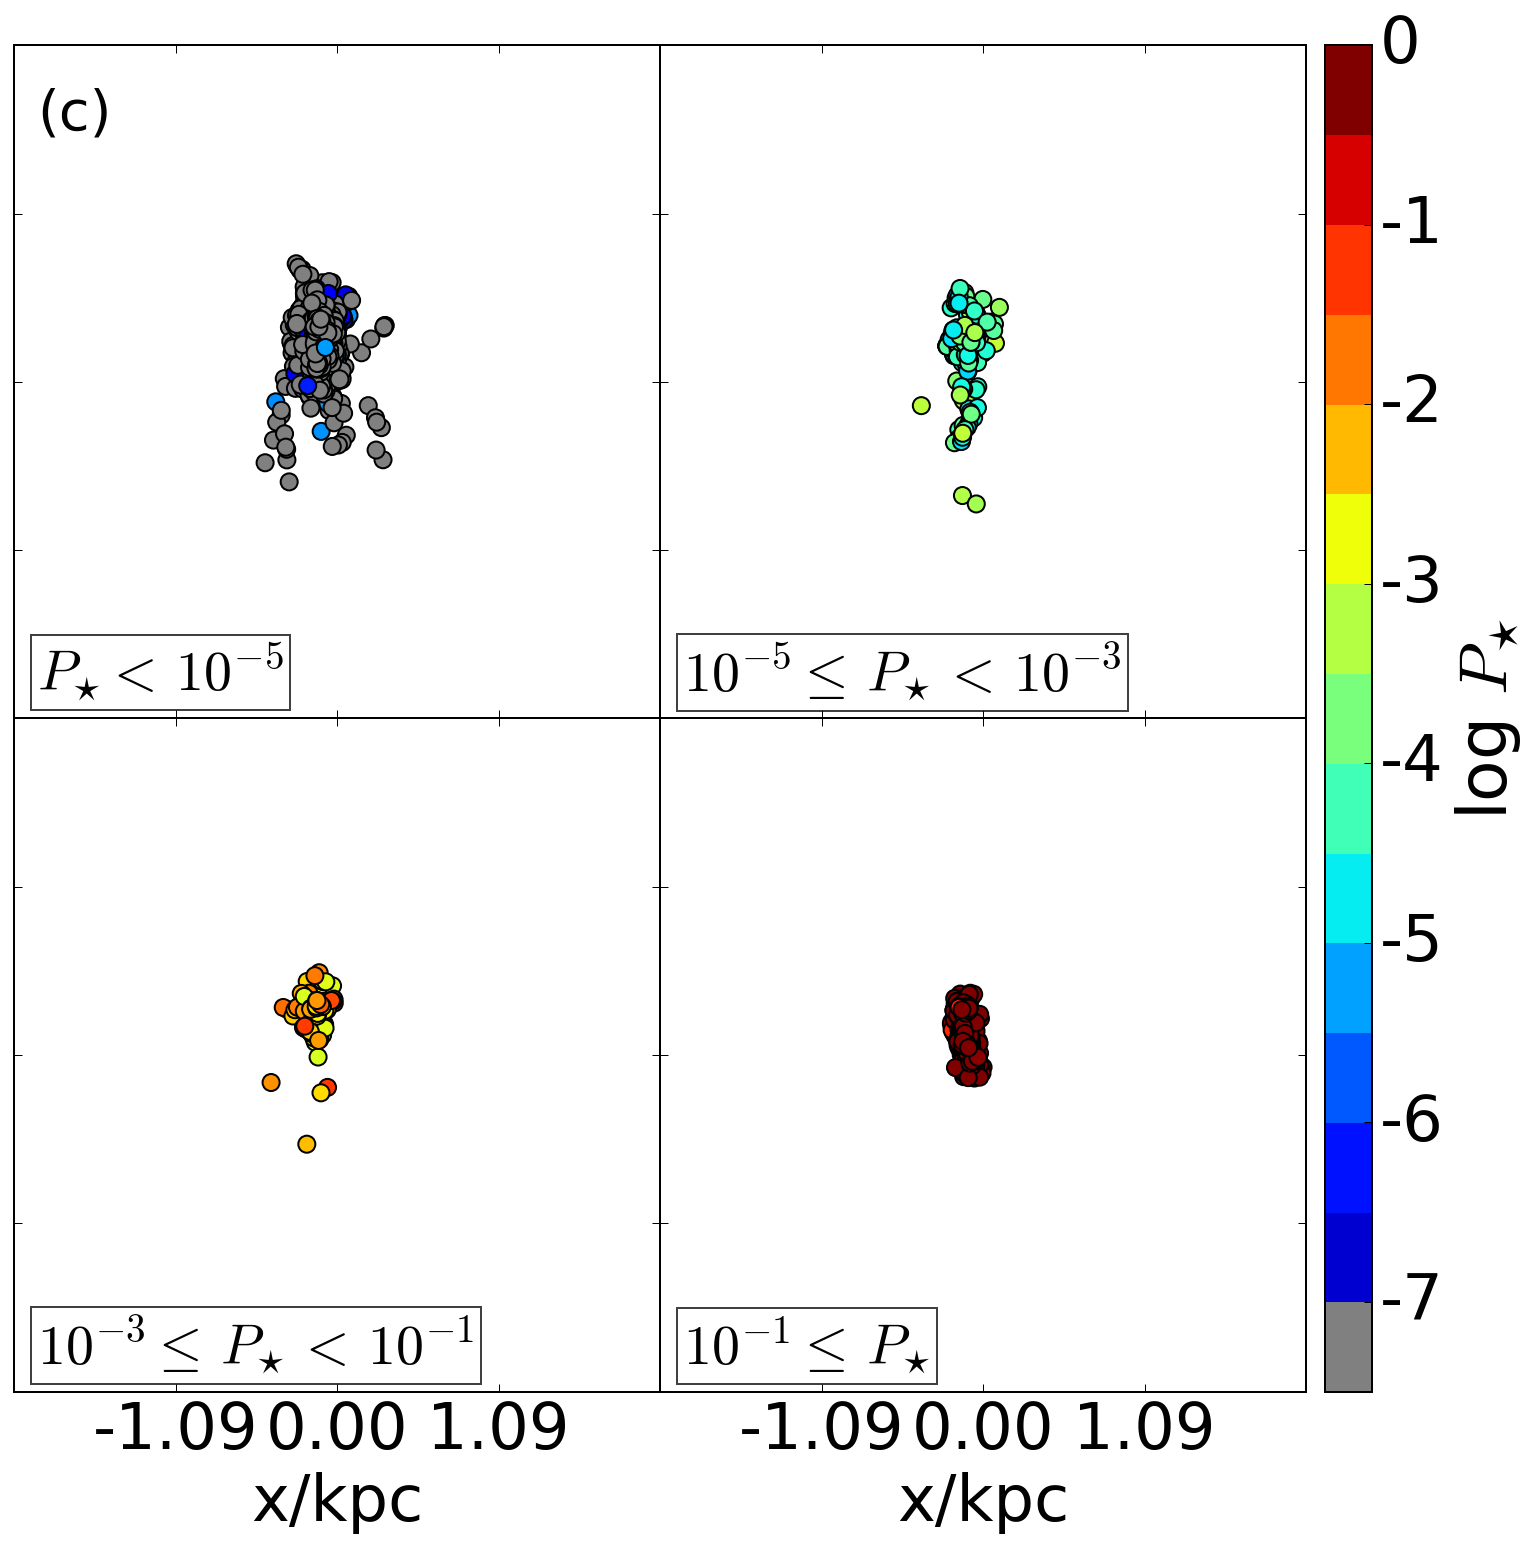

In [259]:
rng1 = (haloPPF <= 1.e-5)
rng2 = ((haloPPF > 1.e-5) & (haloPPF <= 1.e-3))
rng3 = ((haloPPF > 1.e-3) & (haloPPF <= 1.e-1))
rng4 = (haloPPF > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(haloPPF[rng1])
z2=np.log10(haloPPF[rng2])
z3=np.log10(haloPPF[rng3])
z4=np.log10(haloPPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=halomass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=halomass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=halomass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=halomass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$P_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, P_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, P_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax2.yaxis.set_ticks(tics); ax2.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)
ax4.yaxis.set_ticks(tics); ax4.yaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)


ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [ ]:
rng1 = (haloPPF <= 1.e-5)
rng2 = ((haloPPF > 1.e-5) & (haloPPF <= 1.e-3))
rng3 = ((haloPPF > 1.e-3) & (haloPPF <= 1.e-1))
rng4 = (haloPPF > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(haloPPF[rng1])
z2=np.log10(haloPPF[rng2])
z3=np.log10(haloPPF[rng3])
z4=np.log10(haloPPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax4.scatter(xcoord[rng1], ycoord[rng1], s=halomass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng2], ycoord[rng2], s=halomass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng3], ycoord[rng3], s=halomass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rng4], ycoord[rng4], s=halomass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax4.text(xpos,ypos,'$P_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-5} \leq\, P_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-3} \leq\, P_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax1.text(xpos,ypos,'$10^{-1} \leq\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

#ax1.yaxis.set_ticks([]); ax1.yaxis.set_major_formatter(formatter)
#ax3.yaxis.set_ticks([]); ax3.yaxis.set_major_formatter(formatter)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [ ]:
gc.collect()



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


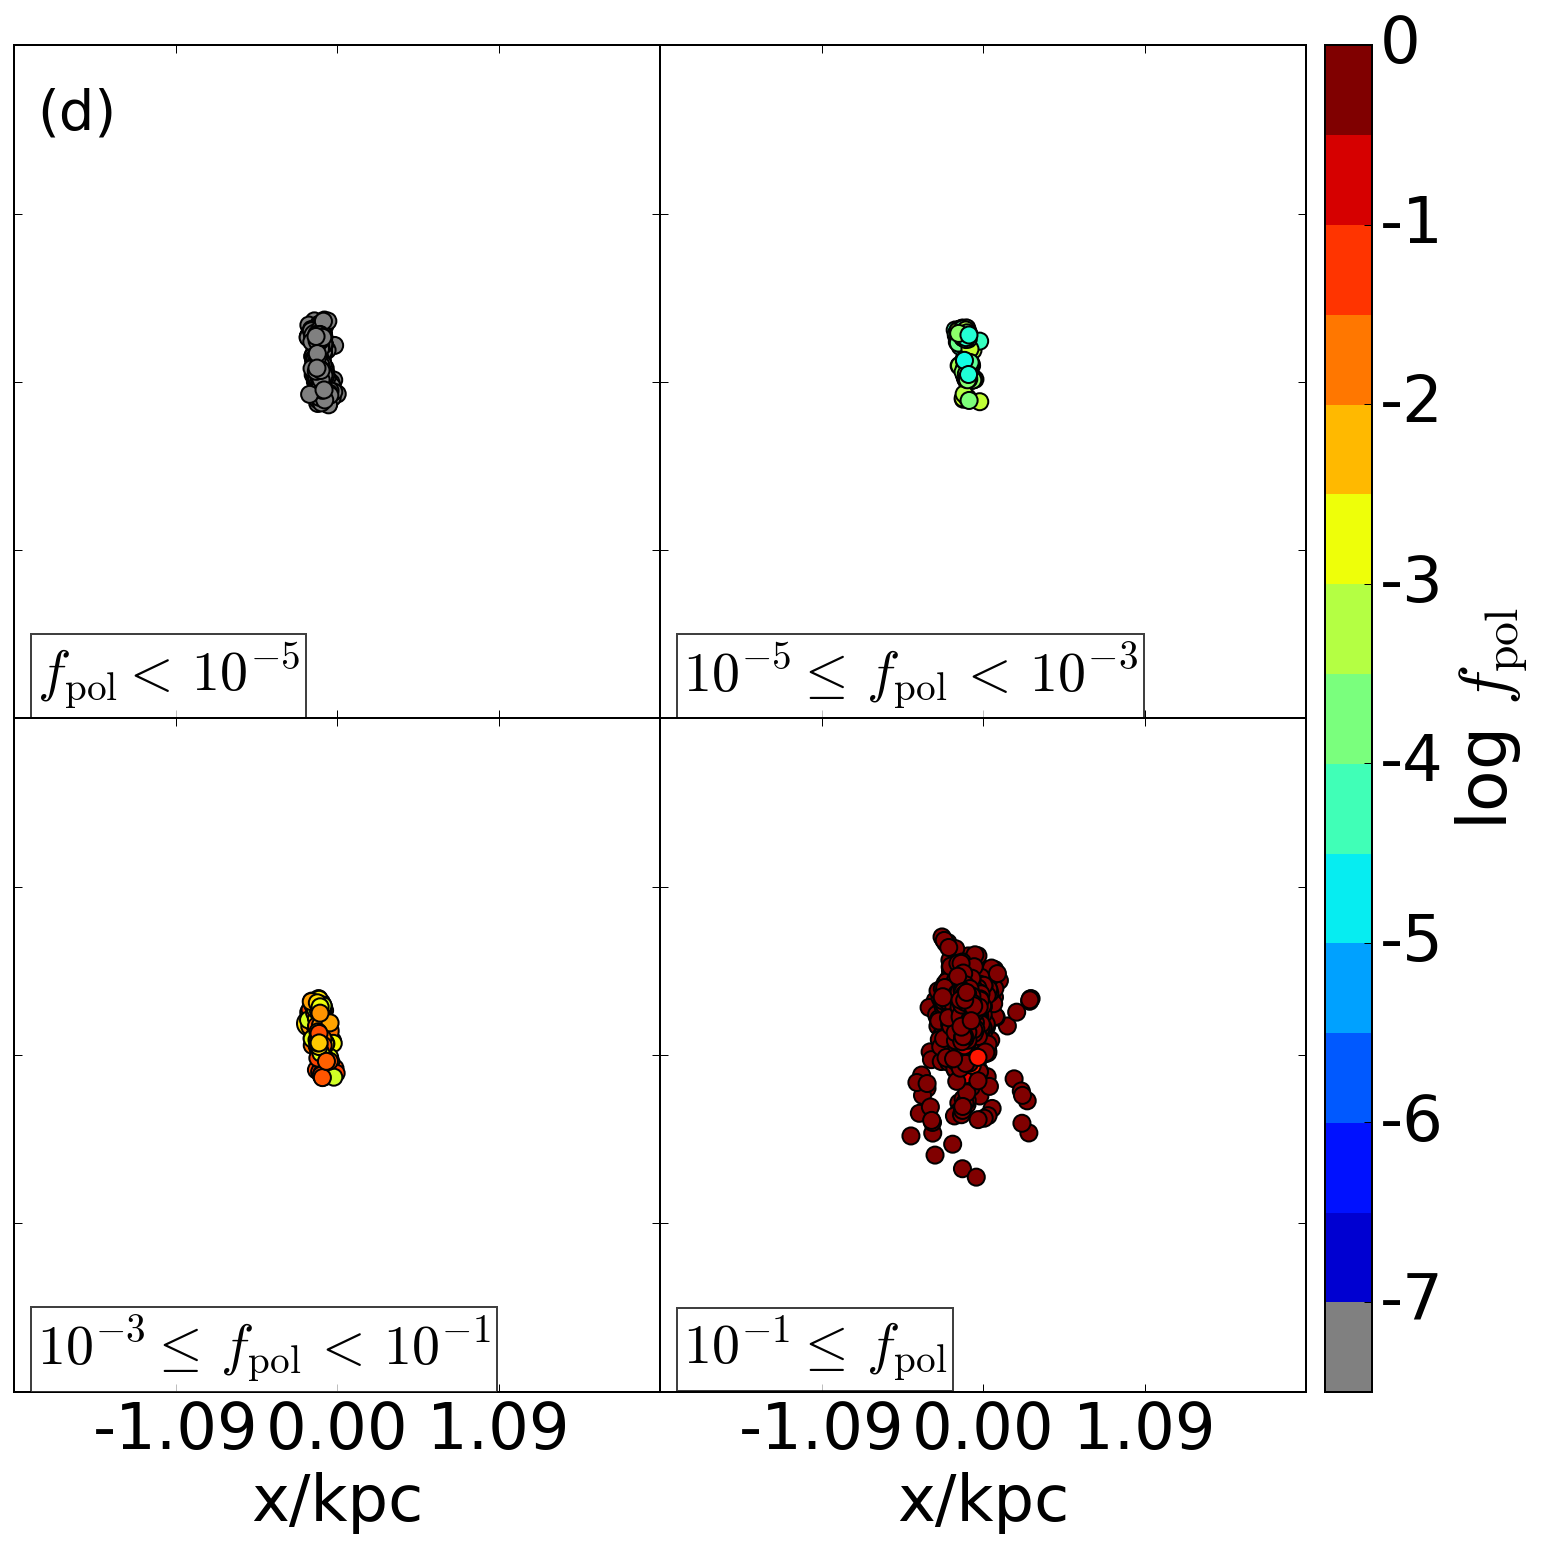

In [261]:
# Plotting fpol: a particle that is 99% pristine falls in P >= .1 ... 
# But that same particle is 1-.99 = 0.01 polluted ... and falls in 0.001 <= fpol < 0.1
halofpol[halofpol < 1e-7] = 10**-7.5
rng1 = (halofpol <= 1.e-5)
rng2 = ((halofpol > 1.e-5) & (halofpol <= 1.e-3))
rng3 = ((halofpol > 1.e-3) & (halofpol <= 1.e-1))
rng4 = (halofpol > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(halofpol[rng1])
z2=np.log10(halofpol[rng2])
z3=np.log10(halofpol[rng3])
z4=np.log10(halofpol[rng4])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=halomass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=halomass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=halomass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=halomass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,r'$f_{\rm pol} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,r'$10^{-5} \leq\, f_{\rm pol}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,r'$10^{-3} \leq\, f_{\rm pol}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,r'$10^{-1} \leq\, f_{\rm pol}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(d)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $f_{\rm pol}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_fpol_locs_fpolcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()